In [1]:
#!pip install numpy matplotlib seaborn pandas scipy tqdm fitter dabest wordcloud scikit-learn tabulate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
import scipy.cluster.hierarchy as sch
from typing import List
from tqdm import tqdm
import math
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import weibull_min
from scipy.stats import ks_2samp
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from multiprocessing.sharedctypes import Value
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
import os
import csv
import pandas as pd
from typing import List
import scipy.cluster.hierarchy as sch
from collections import Counter, OrderedDict, defaultdict
from matplotlib.offsetbox import AnchoredText
import dabest
from wordcloud import WordCloud, STOPWORDS
from sklearn.utils import resample
import scipy.stats
import math
from tabulate import tabulate
from scipy.stats import ks_2samp
from scipy.stats import wasserstein_distance
from scipy.stats import weibull_min
import matplotlib.patches as patches
import matplotlib.ticker as ticker
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from utils import *

%matplotlib inline

In [2]:
default_plotting_params()

# • Load data:

In [3]:
numeric_data, label_data = load_csv(numeric_file="numeric_final.csv", \
                                   label_file="labels_final.csv")


In [4]:
govmechanisms = generate_gov_mechanisms_str()
gov_mechanism_titles = generate_gov_mechanisms_labels()

In [5]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/Users/mccaffary/Desktop/proxima_nova/Proxima_Nova_Reg.otf')
prop_bold = fm.FontProperties(fname='/Users/mccaffary/Desktop/proxima_nova/Proxima_Nova_Semibold.otf')

# ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# • Code to run analysis and visualisation for main text Figures 1, 2, 3, 4, & 5:

# ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# • Figure 1 pre-processing:

In [6]:
gov_mechanisms_filtered_responses_stacked_bar_plot = [
                                     filter_responses_stacked_bar_plot(numeric_data, govmechanisms[i])[0] for i in \
                                     range(len(govmechanisms[:]))
                                    ]


gov_mechanisms_percentage_breakdown_stacked_bar_plot = [list(percentage_breakdown_stacked_bar_plot(sublist).values()) for \
                                       sublist in gov_mechanisms_filtered_responses_stacked_bar_plot]

gov_mechanisms_percentage_breakdown_stacked_bar_plot_rev = [sublist[::-1] for sublist in gov_mechanisms_percentage_breakdown_stacked_bar_plot]

data_stacked_bar_plot, gov_mechanism_titles_ = sort_by_first_element_stacked_bar_plot(gov_mechanisms_percentage_breakdown_stacked_bar_plot_rev, gov_mechanism_titles)

reordered_response_count_vals = generate_reordered_response_counts(gov_mechanism_titles_, \
                                                                   gov_mechanisms_filtered_responses_stacked_bar_plot)


# • Figure 1 visualisation:

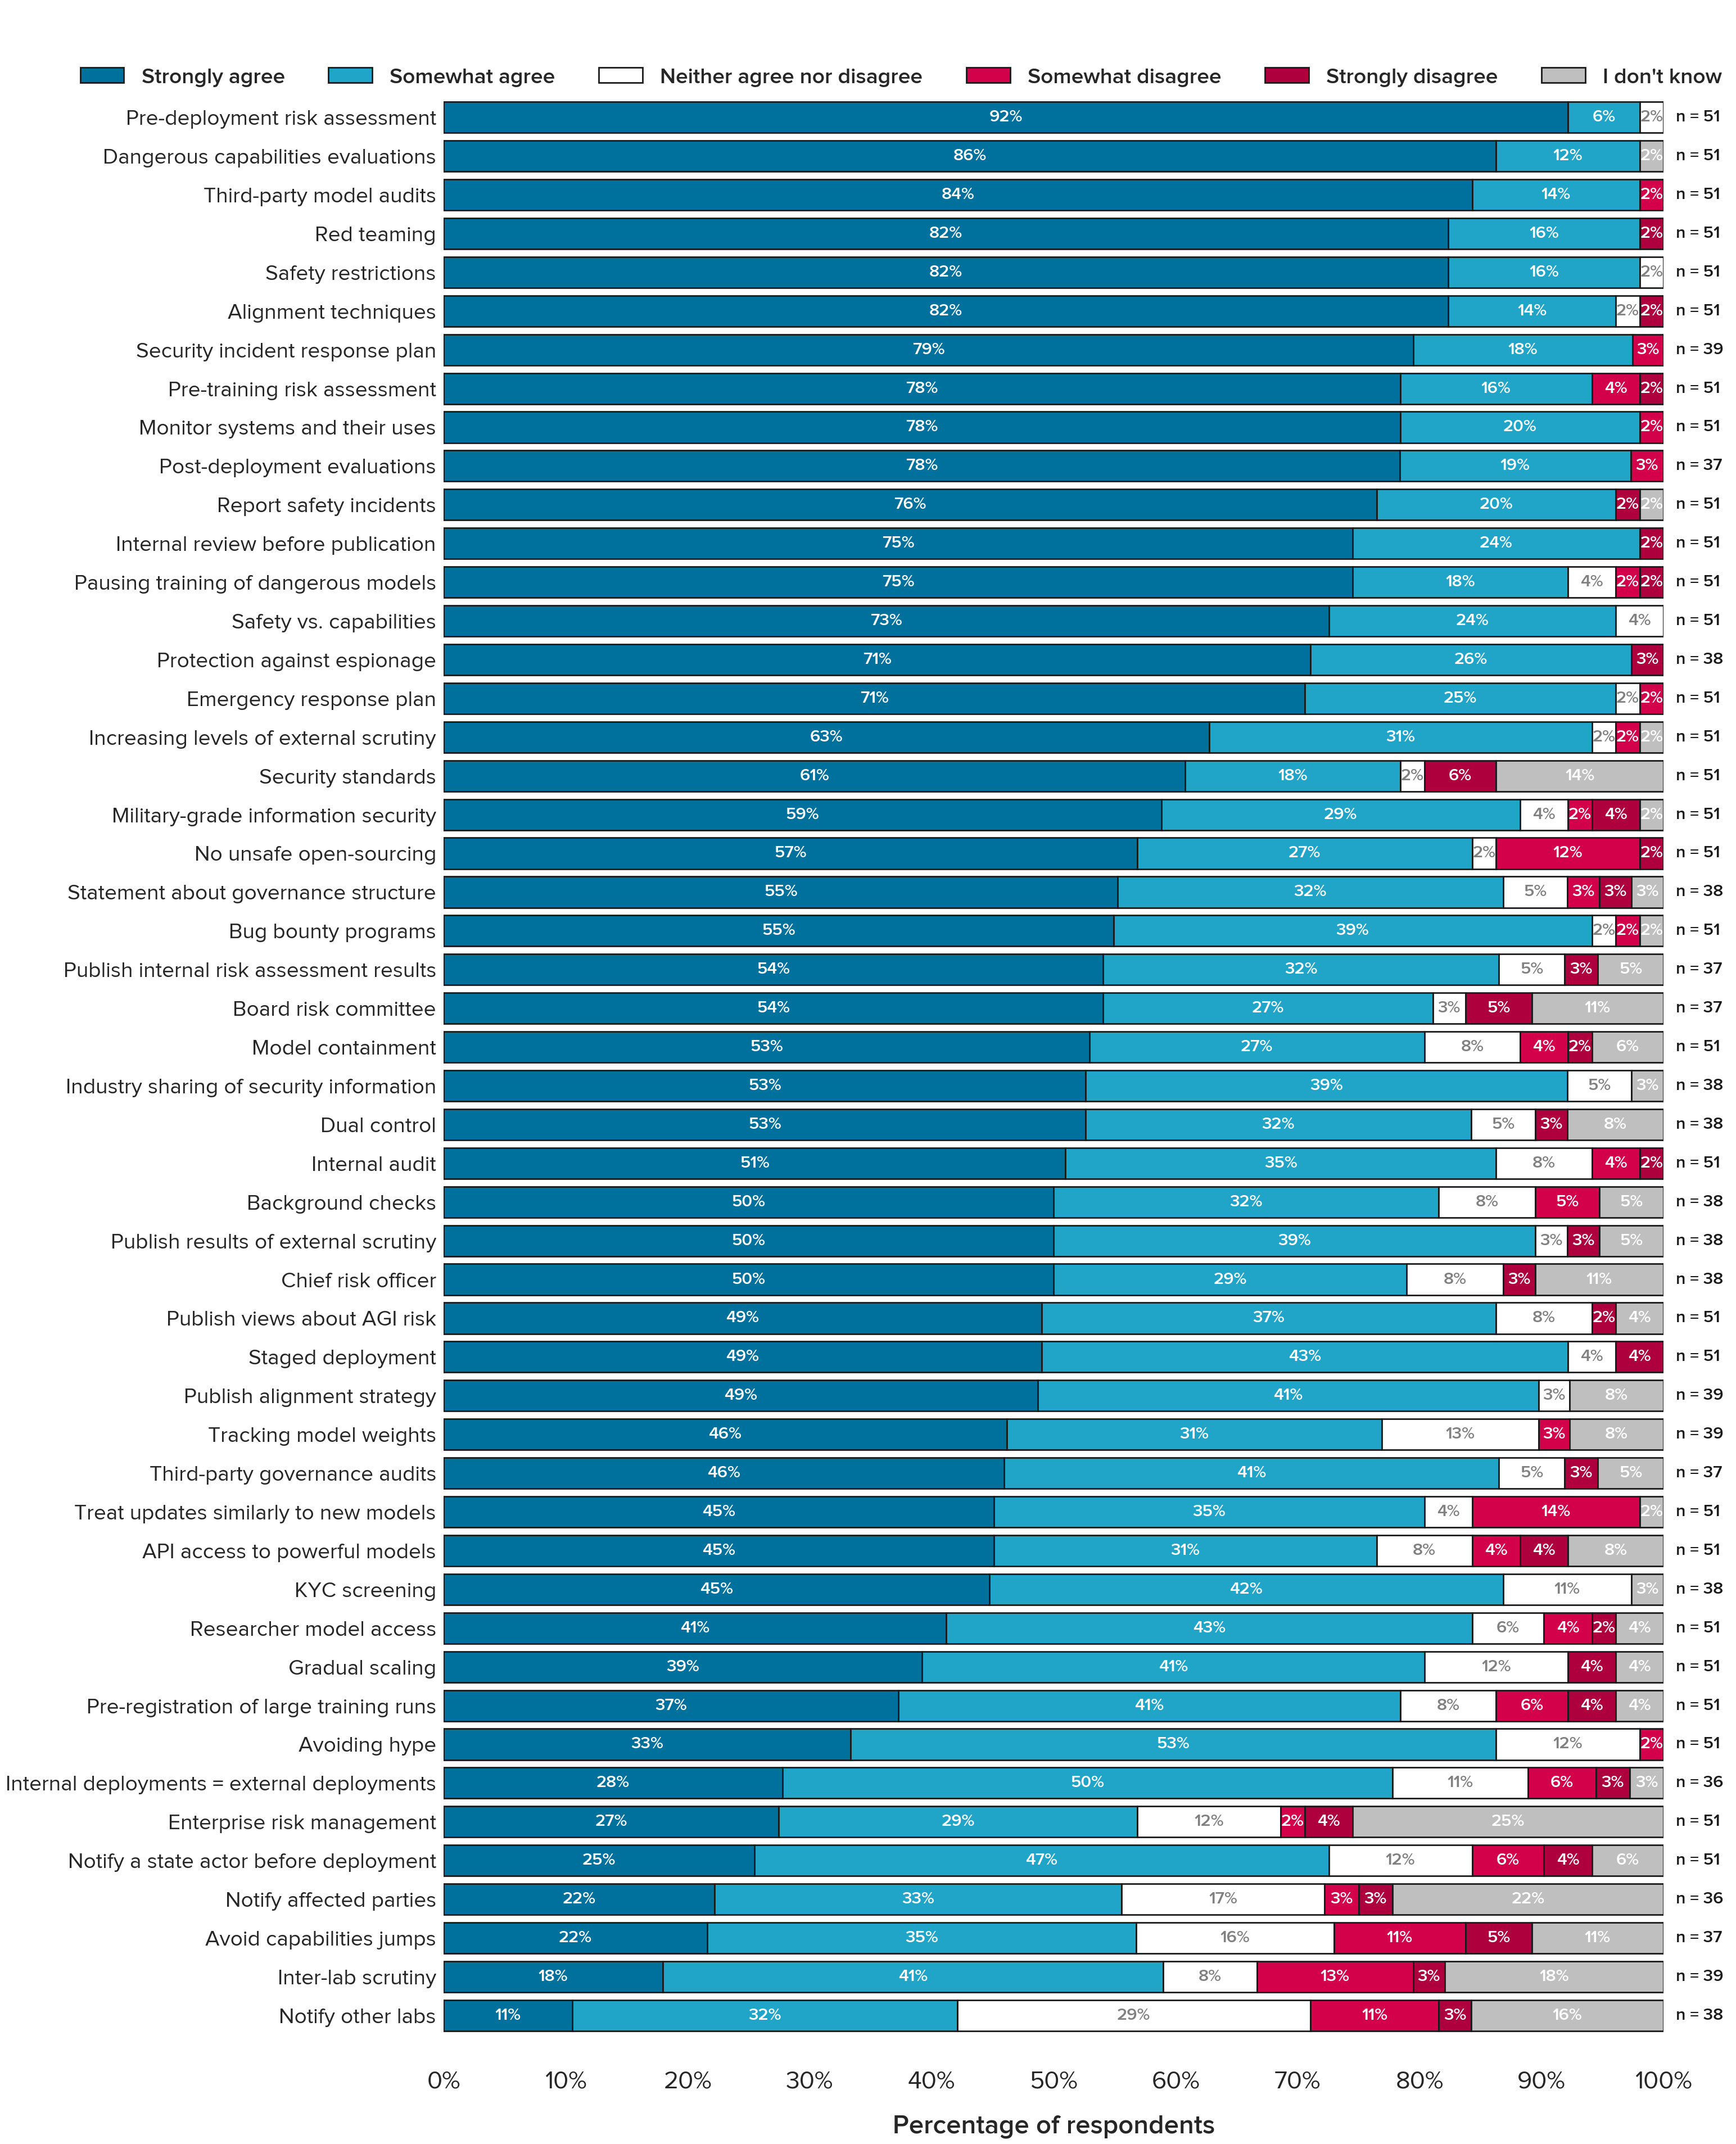

In [7]:
visualise_responses_stacked_barplpot_final(data_stacked_bar_plot, gov_mechanism_titles_, \
                                          reordered_response_count_vals)


# • Figure 2 pre-processing:

In [8]:
gov_mechanisms_filtered_responses = [
                                     filter_responses(numeric_data, govmechanisms[i])[0] for i in \
                                     range(len(govmechanisms[:]))
                                    ]


gov_mechanisms_percentage_breakdown = [list(percentage_breakdown(sublist).values()) for \
                                       sublist in gov_mechanisms_filtered_responses]


gov_mechanisms_filtered_responses_full_numeric = [[elem for elem in sublist if (elem != 3)] for \
                                                  sublist in gov_mechanisms_filtered_responses]

# generate the demographic responses
gender_responses = generate_gender_responses(numeric_data)
sector_responses = generate_sector_responses(numeric_data)
sector_responses_recoded = recode_sector(sector_responses)


# • Figure 2 visualisation:

<Figure size 2000x1000 with 0 Axes>

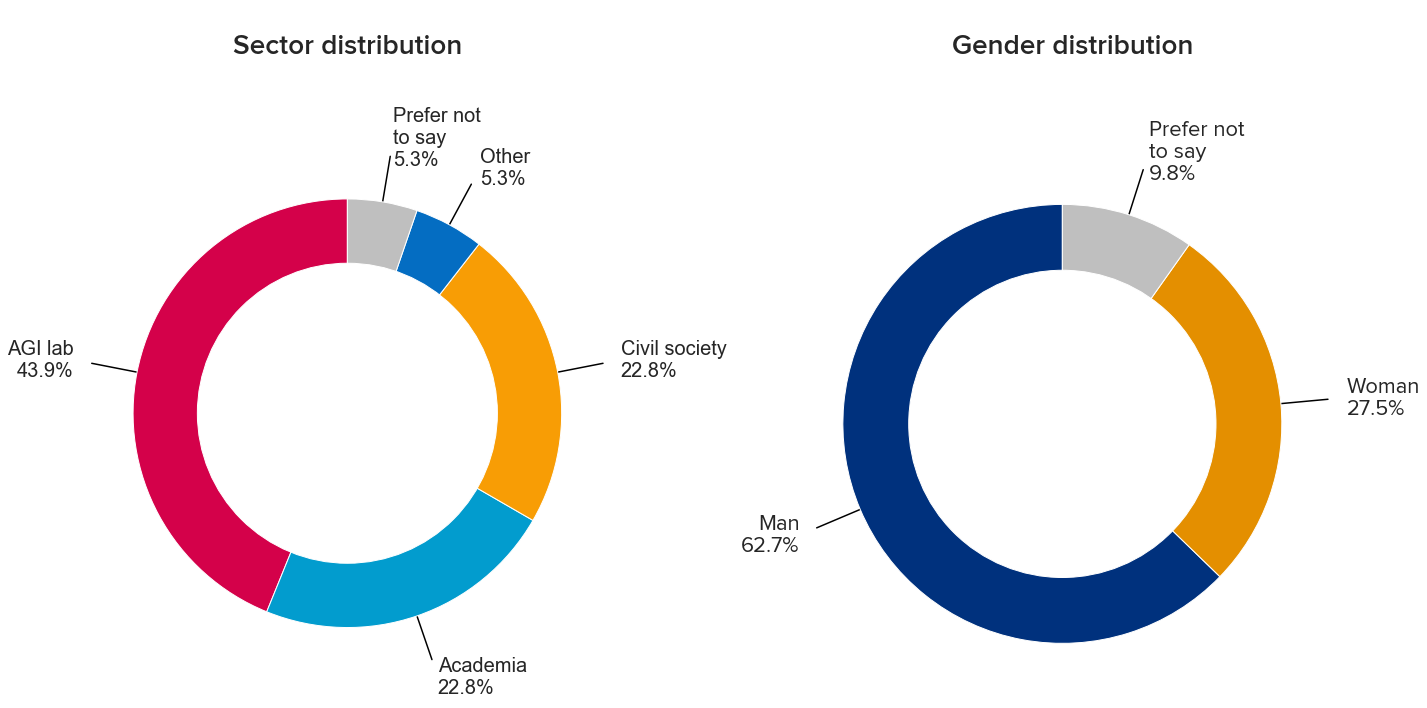

In [9]:
visualise_demographics_figure_2(gender_responses, sector_responses_recoded)

# • Figure 3 pre-processing:

In [10]:
gov_mechanisms_filtered_responses = [
                                     filter_responses(numeric_data, govmechanisms[i])[0] for i in \
                                     range(len(govmechanisms[:]))
                                    ]


gov_mechanisms_percentage_breakdown = [list(percentage_breakdown(sublist).values()) for \
                                       sublist in gov_mechanisms_filtered_responses]


gov_mechanisms_filtered_responses_full_numeric = [[elem for elem in sublist if (elem != 3)] for \
                                                  sublist in gov_mechanisms_filtered_responses]


gov_mechanisms_filtered_responses_full = gov_mechanisms_filtered_responses

gov_mechanisms_means = compute_gov_mechanism_mean(gov_mechanisms_filtered_responses)

gov_mechanisms_means_idx = list(zip([int(i) for i in range(len(gov_mechanisms_means))], \
                                   gov_mechanisms_means))

gov_mechanisms_means_idx_sorted = sorted(gov_mechanisms_means_idx, key=lambda x: x[1])[::-1]
gov_mechanisms_means_idx_ = [elem[0] for elem in gov_mechanisms_means_idx_sorted]
gov_mechanisms_means_vals_ = [elem[1] for elem in gov_mechanisms_means_idx_sorted]

gov_mechanisms_means_full_vals_ = gov_mechanisms_means_vals_

gov_mechanisms_se = compute_gov_mechanism_standard_error(gov_mechanisms_filtered_responses)
gov_mechanisms_se_idx = list(zip([int(i) for i in range(len(gov_mechanisms_se))], \
                                   gov_mechanisms_se))

gov_mechanisms_se_full = compute_gov_mechanism_standard_error(gov_mechanisms_filtered_responses_full)
gov_mechanisms_se_full_idx = list(zip([int(i) for i in range(len(gov_mechanisms_se_full))], \
                                   gov_mechanisms_se_full))

gov_mechanisms_se_full_idx_sorted = sorted(gov_mechanisms_se_full_idx, key=lambda x: x[1])[::-1]
gov_mechanisms_se_full_idx_ = [elem[0] for elem in gov_mechanisms_se_full_idx_sorted]
gov_mechanisms_se_full_vals_ = [elem[1] for elem in gov_mechanisms_se_full_idx_sorted]

errors_lowest_mean_agreement = gov_mechanisms_se_full_vals_[:5]
errors_highest_mean_agreement = gov_mechanisms_se_full_vals_[45:]

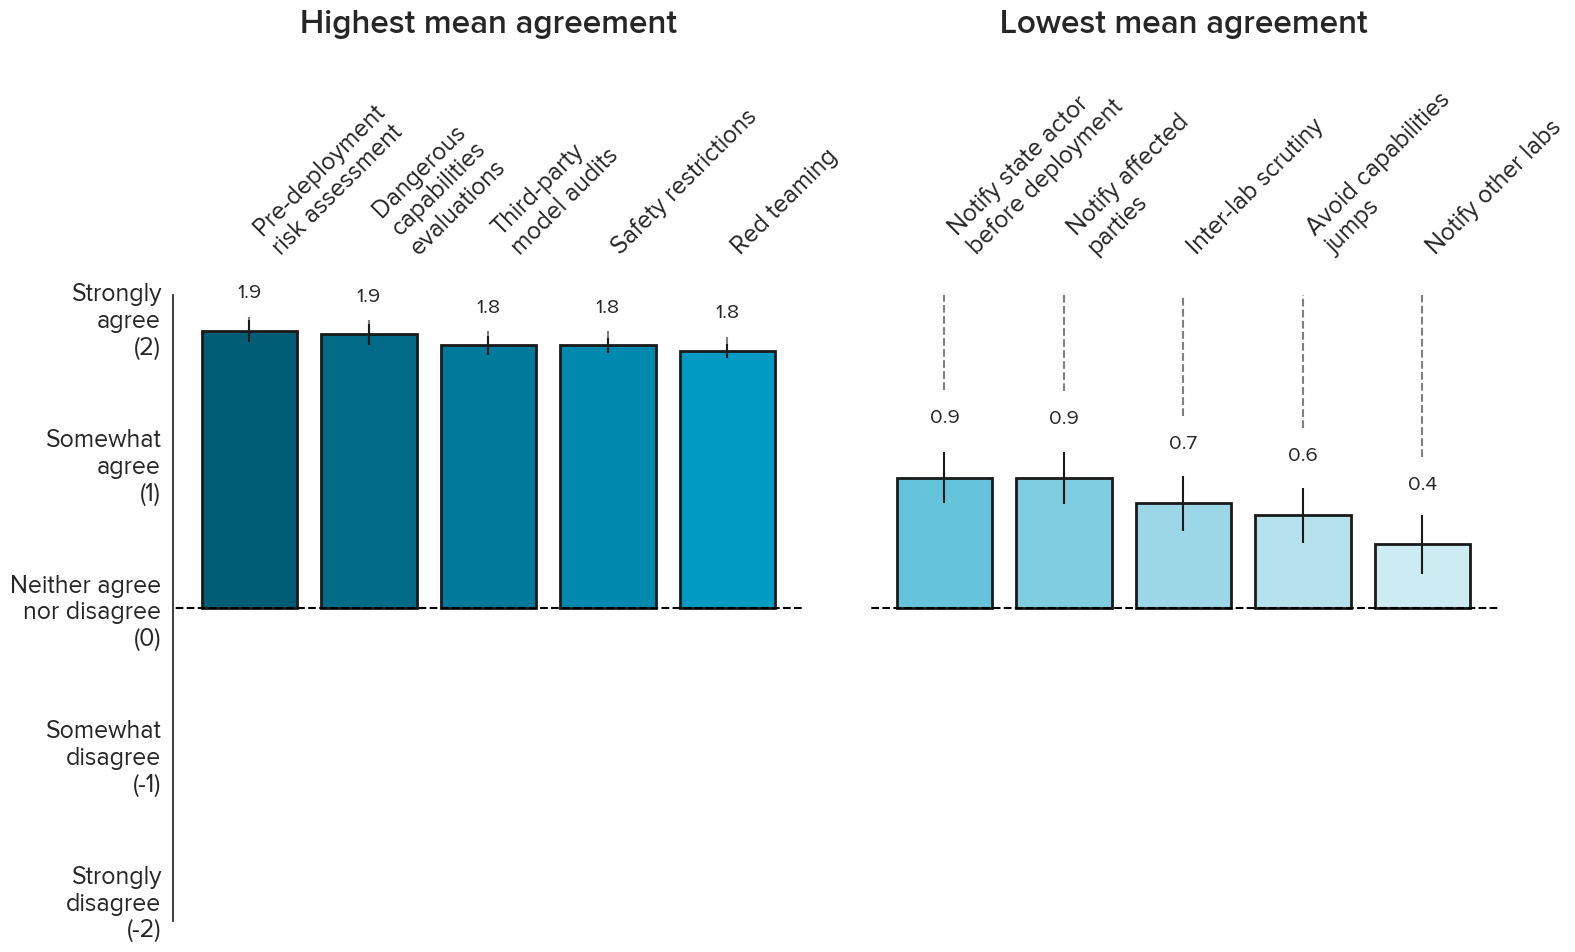

In [11]:
visualise_lowest_highest_mean_agreement_mechanisms_final(gov_mechanisms_means_full_vals_, \
                                                          errors_lowest_mean_agreement, \
                                                          errors_highest_mean_agreement)


# • Figure 4 pre-processing:

In [12]:
gov_mechanisms_means_full = compute_gov_mechanism_mean(gov_mechanisms_filtered_responses_full)

gov_mechanisms_means_full_idx = list(zip([int(i) for i in range(len(gov_mechanisms_means_full))], \
                                   gov_mechanisms_means_full))

gov_mechanisms_means_full_idx_sorted = sorted(gov_mechanisms_means_full_idx, key=lambda x: x[1])[::-1]
gov_mechanisms_means_full_idx_ = [elem[0] for elem in gov_mechanisms_means_full_idx_sorted]
gov_mechanisms_means_full_vals_ = [elem[1] for elem in gov_mechanisms_means_full_idx_sorted]

gov_mechanism_titles_ordered_full = [gov_mechanism_titles[idx] for idx in gov_mechanisms_means_full_idx_][::-1]
gov_mechanism_titles_ordered_full_edit = ["– " + elem for elem in gov_mechanism_titles_ordered_full]


# • Figure 4 visualisation:

In [13]:
gov_mechanisms_means_full = compute_gov_mechanism_mean(gov_mechanisms_filtered_responses_full)

gov_mechanisms_means_full_idx = list(zip([int(i) for i in range(len(gov_mechanisms_means_full))], \
                                   gov_mechanisms_means_full))

gov_mechanisms_means_full_idx_sorted = sorted(gov_mechanisms_means_full_idx, key=lambda x: x[1])[::-1]
gov_mechanisms_means_full_idx_ = [elem[0] for elem in gov_mechanisms_means_full_idx_sorted]
gov_mechanisms_means_full_vals_ = [elem[1] for elem in gov_mechanisms_means_full_idx_sorted]

gov_mechanism_titles_ordered_full = [gov_mechanism_titles[idx] for idx in gov_mechanisms_means_full_idx_][::-1]
gov_mechanism_titles_ordered_full_edit = [elem for elem in gov_mechanism_titles_ordered_full]


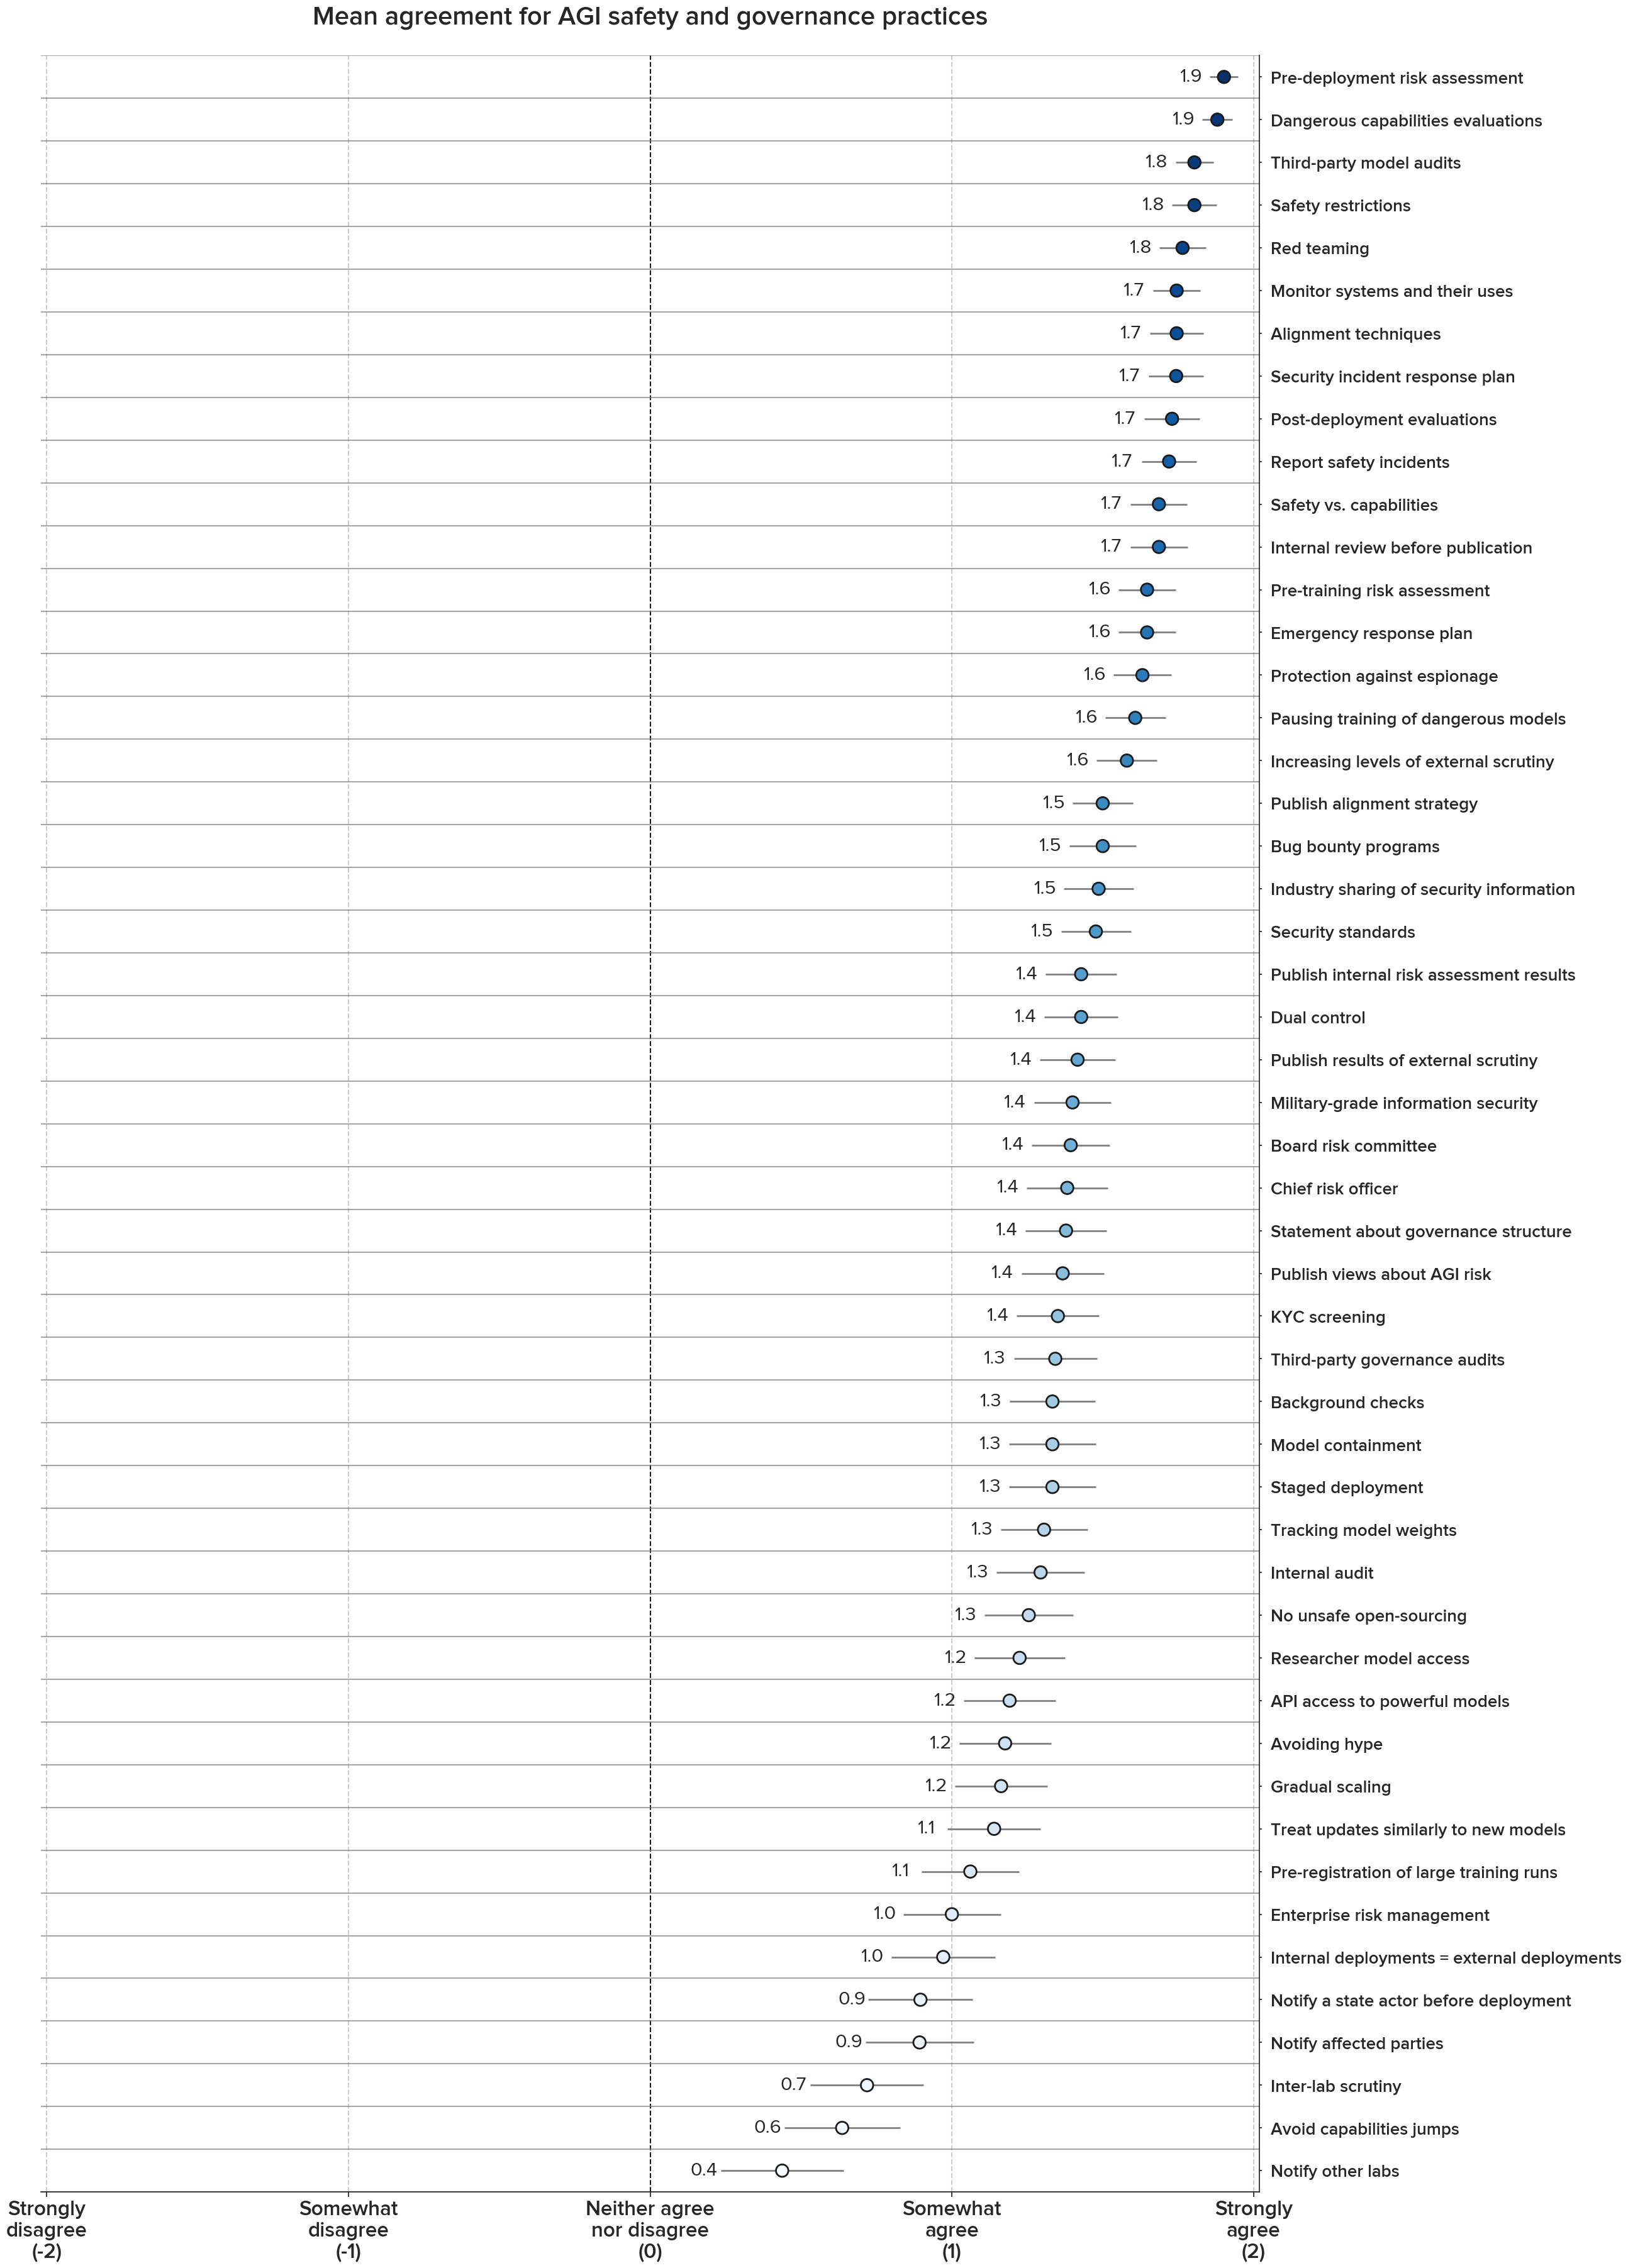

In [14]:
visualise_mean_agreement_all_mechanisms_final(gov_mechanisms_means_full_vals_, \
                                           gov_mechanisms_se_full_vals_, \
                                           gov_mechanisms_means_full_idx_, \
                                           gov_mechanism_titles_ordered_full_edit)


# • Figure 5 pre-processing:

In [15]:
gov_mechanisms_percentages = generate_gov_mechanisms_percentages(gov_mechanisms_filtered_responses_full)

### Mechanisms with highest proportion of "I don't know" responses
indexed_percentages = [(i, sublist) for i, sublist in enumerate(gov_mechanisms_percentages)]
sorted_indexed_percentages = sorted(indexed_percentages, key=lambda x: x[1][-1], reverse=True)
top_5_indices_zero = [x[0] for x in sorted_indexed_percentages[:5]]
gov_mechanism_titles_top_5_dont_know = [gov_mechanism_titles[idx] for idx in top_5_indices_zero]
intermediate_dont_know_vals_ = [elem[1] for elem in sorted_indexed_percentages[:5]]
intermediate_dont_know_vals = [elem[-1] for elem in intermediate_dont_know_vals_]
dont_know_ranking = list(zip(gov_mechanism_titles_top_5_dont_know, intermediate_dont_know_vals))
dont_know_ranking_sorted = sorted(dont_know_ranking, key=lambda x: x[1], reverse=True)

### Mechanisms with highest proportion of "Neither agree nor disagree" responses
indexed_percentages = [(i, sublist) for i, sublist in enumerate(gov_mechanisms_percentages)]
sorted_indexed_percentages_neither = sorted(indexed_percentages, key=lambda x: x[1][2], reverse=True)
top_5_indices_neither = [x[0] for x in sorted_indexed_percentages_neither[:5]]
gov_mechanism_titles_top_5_neither = [gov_mechanism_titles[idx] for idx in top_5_indices_neither]
intermediate_neither_vals_ = [elem[1] for elem in sorted_indexed_percentages_neither[:5]]
intermediate_neither_vals = [elem[2] for elem in intermediate_neither_vals_]
neither_ranking = list(zip(gov_mechanism_titles_top_5_neither, intermediate_dont_know_vals))
neither_ranking_sorted = sorted(neither_ranking, key=lambda x: x[1], reverse=True)


# • Figure 5 visualisation:

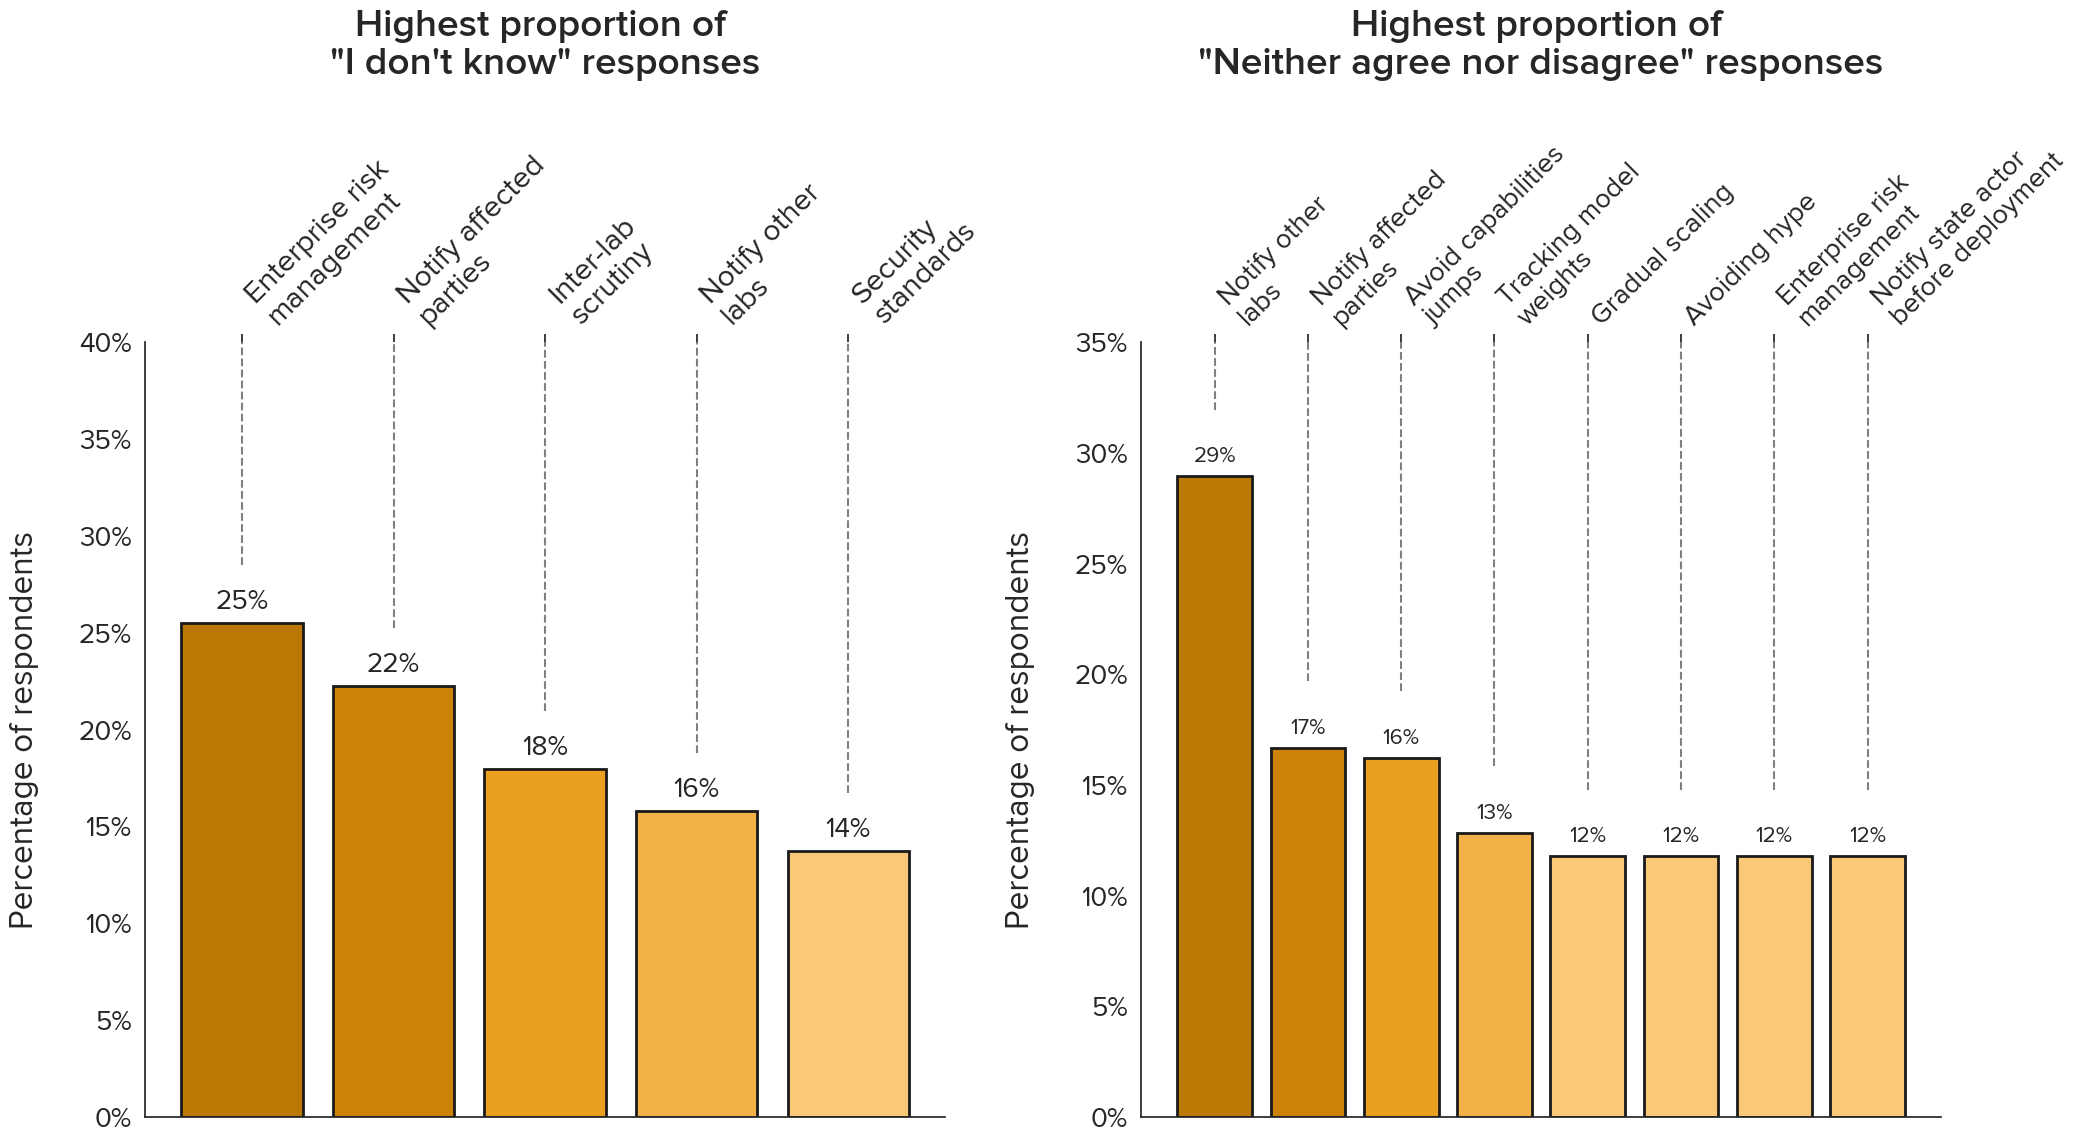

In [16]:
visualise_highest_proportion_mechanisms_figure_5_final(intermediate_dont_know_vals, \
                                                    gov_mechanism_titles_top_5_dont_know, \
                                                    intermediate_neither_vals, \
                                                    gov_mechanism_titles_top_5_neither)


# • Some key statistics:

## • Overall mean across all Qs:

In [17]:
overall_mean = np.mean(gov_mechanisms_means_full)
print("Overall mean: {}".format(np.round(overall_mean,2)))

Overall mean: 1.39


## • Mean % agreement ("somewhat agree" + "strongly agree") across all Qs:

In [18]:
gov_mechanisms_agreement_total_list = [sublist[3] + sublist[4] for sublist in gov_mechanisms_percentage_breakdown]
overall_mean_percentage_agrement = np.mean(gov_mechanisms_agreement_total_list)
print("Overall mean % agreement: {}%".format(np.round(overall_mean_percentage_agrement,1)))

Overall mean % agreement: 85.2%


## • Proportion of mechanisms with >50% "strongly agree":

In [19]:
majority_strongly_agree = compute_proportion_responses_strongly_agree_majority(gov_mechanisms_percentage_breakdown)
print("Mechanisms with majority strongly agree: {}%".format(np.round(majority_strongly_agree,1)))

Mechanisms with majority strongly agree: 56.0%


## • Proportion of mechanisms with >50% "strongly agree" or "somewhat agree":

In [20]:
majority_somwhat_strongly_agree = compute_proportion_responses_somehwat_strongly_agree_majority(gov_mechanisms_percentage_breakdown)
print("Mechanisms with majority somewhat + strongly agree: {}%".format(np.round(majority_somwhat_strongly_agree,1)))


Mechanisms with majority somewhat + strongly agree: 98.0%


## • Average disagreement ("somewhat disagree" + "strongly disagree") across all mechanisms:

In [21]:
mean_disagreement = mean_disagreement_across_mechanisms(gov_mechanisms_percentage_breakdown)
print("Mean disagreement across all mechanisms: {}%".format(np.round(mean_disagreement,1)))

Mean disagreement across all mechanisms: 4.6%


## • Mechanism with greatest disagreement ("somewhat disagree" + "strongly disagree"):

In [22]:
total_disagreement = total_disagreement_across_mechanisms(gov_mechanisms_percentage_breakdown)
total_disagreement_idx = list(zip(gov_mechanism_titles, total_disagreement))
total_disagreement_sorted = sorted(total_disagreement_idx, key = lambda x: x[1], reverse=True)
most_disagreed_mechanism = total_disagreement_sorted[0]
print("The mechanism with the greatest disagreement is {}: {}%".format(most_disagreed_mechanism[0], \
                                                                       np.round(most_disagreed_mechanism[1],1)))


The mechanism with the greatest disagreement is Avoid capabilities jumps: 16.2%


## • What percentage of total responses were disagreement?

In [23]:
gov_mechanisms_collapsed_responses = [item for sublist in gov_mechanisms_filtered_responses for item in sublist]
percentage_disagreement_responses = sum([1 for item in gov_mechanisms_collapsed_responses if item in \
                                         (-2, -1)]) / len(gov_mechanisms_collapsed_responses) * 100

print(f"Percentage of disagreement responses: {percentage_disagreement_responses:.1f}%")
print("Total number of responses: {}".format(len(gov_mechanisms_collapsed_responses)))

Percentage of disagreement responses: 4.5%
Total number of responses: 2285


# • Statistical tests:

## • Chi-squared test (with Holm-Bonferroni correction for multiple comparisons) for significant difference in the distribution of responses _to each mechanism_, divided by the demographic variable "gender". Note that, due to small (or absent) sample sizes in some of the categories, this test is only conducted for the gender variables "Man" and "Woman". 

In [24]:
man_idx, woman_idx = generate_gender_indices(numeric_data)

# Get filtered responses for each category
filtered_responses = [
    filter_responses_gender(numeric_data, govmechanisms[i], man_idx, woman_idx)
    for i in range(len(govmechanisms[:]))
]

gov_mechanisms_filtered_responses_full_man = [
    man_responses[0] for man_responses, _ in filtered_responses
]

gov_mechanisms_filtered_responses_full_woman = [
    woman_responses[1] for _, woman_responses in filtered_responses
]

# Get the percentage breakdown for each category
gov_mechanisms_percentage_breakdown_full_man = [
    list(percentage_breakdown(sublist).values())
    for sublist in gov_mechanisms_filtered_responses_full_man
]

gov_mechanisms_percentage_breakdown_full_woman = [
    list(percentage_breakdown(sublist).values())
    for sublist in gov_mechanisms_filtered_responses_full_woman
]



# Test the distributions
comparison_results = compare_distributions(gov_mechanisms_filtered_responses_full_man, \
                                           gov_mechanisms_filtered_responses_full_woman)

# Perform Holm-Bonferroni correction
num_tests = len(comparison_results)
alpha = 0.05
p_values = [p for _, p, _, _ in comparison_results]
sorted_indices = np.argsort(p_values)
sorted_p_values = np.sort(p_values)

holm_bonferroni_alpha = [alpha / (num_tests - i) for i in range(num_tests)]

# Compare p-values with the Holm-Bonferroni-adjusted significance levels
for i, p in zip(sorted_indices, sorted_p_values):
    chi2, _, dof, expected = comparison_results[i]
    significance = "Significant *" if p < holm_bonferroni_alpha[i] else "Not significant"
    print(f"{gov_mechanism_titles[i]}: chi2={chi2:.2f}, p={p:.5f}, dof={dof}, {significance}")
    print("\n")


Monitor systems and their uses: chi2=5.59, p=0.06111, dof=2, Not significant


Treat internal deployments similar to external deployments: chi2=6.92, p=0.07459, dof=3, Not significant


Chief risk officer: chi2=6.54, p=0.08806, dof=3, Not significant


Post-deployment evaluations: chi2=2.56, p=0.10962, dof=1, Not significant


Publish results of internal risk assessments: chi2=5.82, p=0.12052, dof=3, Not significant


Gradual scaling: chi2=5.70, p=0.12742, dof=3, Not significant


Inter-lab scrutiny: chi2=7.00, p=0.13565, dof=4, Not significant


Notify affected parties: chi2=6.79, p=0.14753, dof=4, Not significant


Avoid capabilities jumps: chi2=7.98, p=0.15726, dof=5, Not significant


Safety restrictions: chi2=3.61, p=0.16430, dof=2, Not significant


Enterprise risk management: chi2=7.62, p=0.17831, dof=5, Not significant


Pre-deployment risk assessment: chi2=3.16, p=0.20582, dof=2, Not significant


Alignment techniques: chi2=4.24, p=0.23700, dof=3, Not significant


Treat updat

## • Chi-squared test (with Holm-Bonferroni correction for multiple comparisons) for significant difference in the distribution of responses _to each mechanism_, divided by the demographic variable "sector". Note that, due to small (or absent) sample sizes in some of the categories, this test is only conducted for the sector variables "AGI labs", "Academia", and "Civil society". 

In [25]:
agi_lab_idx, academia_idx, civil_society_idx, other_idx, prefer_not_idx = generate_recoded_sector_indices_chi_sq(numeric_data)

categories_idx = [agi_lab_idx, academia_idx, civil_society_idx, other_idx, prefer_not_idx]

# Filter responses for each category
filtered_responses_by_category = [
    [
        filter_responses_by_category(numeric_data, govmechanisms[i], category_idx)
        for i in range(len(govmechanisms[:]))
    ]
    for category_idx in categories_idx
]

# Collect the responses, divided by recoded sector categories
agi_resps_ = (filtered_responses_by_category)[0]
agi_resps = [list(sub_tuple) for sub_tuple in agi_resps_]

academia_resps_ = (filtered_responses_by_category)[1]
academia_resps = [list(sub_tuple) for sub_tuple in academia_resps_]

civil_society_resps_ = (filtered_responses_by_category)[2]
civil_society_resps = [list(sub_tuple) for sub_tuple in civil_society_resps_]

other_resps_ = (filtered_responses_by_category)[3]
other_resps = [list(sub_tuple) for sub_tuple in other_resps_]

prefer_not_resps_ = (filtered_responses_by_category)[4]
prefer_not_resps = [list(sub_tuple) for sub_tuple in prefer_not_resps_]


## • Comparison: AGI labs vs. Academia:

In [26]:
# Test the distributions
comparison_results = compare_distributions(agi_resps, \
                                           academia_resps)

# Perform Holm-Bonferroni correction
num_tests = len(comparison_results)
alpha = 0.05
p_values = [p for _, p, _, _ in comparison_results]
sorted_indices = np.argsort(p_values)
sorted_p_values = np.sort(p_values)

holm_bonferroni_alpha = [alpha / (num_tests - i) for i in range(num_tests)]

# Compare p-values with the Holm-Bonferroni-adjusted significance levels
for i, p in zip(sorted_indices, sorted_p_values):
    chi2, _, dof, expected = comparison_results[i]
    significance = "Significant *" if p < holm_bonferroni_alpha[i] else "Not significant"
    print(f"{gov_mechanism_titles[i]}: chi2={chi2:.2f}, p={p:.5f}, dof={dof}, {significance}")
    print("\n")
    

Notify affected parties: chi2=4.00, p=0.13534, dof=2, Not significant


Military-grade information security: chi2=4.00, p=0.13534, dof=2, Not significant


Dual control: chi2=4.00, p=0.13534, dof=2, Not significant


Inter-lab scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


Treat updates similarly to new models: chi2=4.00, p=0.13534, dof=2, Not significant


Tracking model weights: chi2=4.00, p=0.13534, dof=2, Not significant


Publish results of external scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


Publish views about AGI risk: chi2=4.00, p=0.13534, dof=2, Not significant


Notify a state actor before deployment: chi2=4.00, p=0.13534, dof=2, Not significant


Avoid capabilities jumps: chi2=4.00, p=0.13534, dof=2, Not significant


Publish alignment strategy: chi2=4.00, p=0.13534, dof=2, Not significant


Dangerous capabilities evaluations: chi2=4.00, p=0.13534, dof=2, Not significant


Gradual scaling: chi2=4.00, p=0.13534, dof=2, Not significant


Publish results

/Users/mccaffary/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


## • Comparison: AGI labs vs. Civil society:

In [27]:
# Test the distributions
comparison_results = compare_distributions(agi_resps, \
                                           civil_society_resps)

# Perform Holm-Bonferroni correction
num_tests = len(comparison_results)
alpha = 0.05
p_values = [p for _, p, _, _ in comparison_results]
sorted_indices = np.argsort(p_values)
sorted_p_values = np.sort(p_values)

holm_bonferroni_alpha = [alpha / (num_tests - i) for i in range(num_tests)]

# Compare p-values with the Holm-Bonferroni-adjusted significance levels
for i, p in zip(sorted_indices, sorted_p_values):
    chi2, _, dof, expected = comparison_results[i]
    significance = "Significant *" if p < holm_bonferroni_alpha[i] else "Not significant"
    print(f"{gov_mechanism_titles[i]}: chi2={chi2:.2f}, p={p:.5f}, dof={dof}, {significance}")
    print("\n")
    

Background checks: chi2=4.00, p=0.13534, dof=2, Not significant


KYC screening: chi2=4.00, p=0.13534, dof=2, Not significant


Publish views about AGI risk: chi2=4.00, p=0.13534, dof=2, Not significant


Publish results of external scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


Increasing levels of external scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


Board risk committee: chi2=4.00, p=0.13534, dof=2, Not significant


Bug bounty programs: chi2=4.00, p=0.13534, dof=2, Not significant


Researcher model access: chi2=4.00, p=0.13534, dof=2, Not significant


Chief risk officer: chi2=4.00, p=0.13534, dof=2, Not significant


Third-party governance audits: chi2=4.00, p=0.13534, dof=2, Not significant


Notify other labs: chi2=4.00, p=0.13534, dof=2, Not significant


Tracking model weights: chi2=4.00, p=0.13534, dof=2, Not significant


Dual control: chi2=4.00, p=0.13534, dof=2, Not significant


Avoid capabilities jumps: chi2=4.00, p=0.13534, dof=2, Not significant


## • Comparison: Academia vs. Civil society:

In [28]:
# Compare p-values with the Holm-Bonferroni-adjusted significance levels
for i, p in zip(sorted_indices, sorted_p_values):
    chi2, _, dof, expected = comparison_results[i]
    print(f"p: {p}, type: {type(p)}")  # Add this line
    print(f"Holm-Bonferroni alpha: {holm_bonferroni_alpha[i]}, type: {type(holm_bonferroni_alpha[i])}")  # Add this line
    significance = "Significant *" if p < holm_bonferroni_alpha[i] else "Not significant"
    print(f"{gov_mechanism_titles[i]}: chi2={chi2:.2f}, p={p:.5f}, dof={dof}, {significance}")
    print("\n")


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni alpha: 0.05, type: <class 'float'>
Background checks: chi2=4.00, p=0.13534, dof=2, Not significant


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni alpha: 0.0029411764705882353, type: <class 'float'>
KYC screening: chi2=4.00, p=0.13534, dof=2, Not significant


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni alpha: 0.002, type: <class 'float'>
Publish views about AGI risk: chi2=4.00, p=0.13534, dof=2, Not significant


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni alpha: 0.025, type: <class 'float'>
Publish results of external scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni alpha: 0.001851851851851852, type: <class 'float'>
Increasing levels of external scrutiny: chi2=4.00, p=0.13534, dof=2, Not significant


p: 0.1353352832366127, type: <class 'numpy.float64'>
Holm-Bonferroni

## • Comparison of _full response distribution, collapsing across mechanisms_ using Mann-Witney U-test:

## • Comparison of the gender division "Man" vs. "Woman" for responses collapsed across all questions, employing the Mann-Wtiney U-test. Note that, due to small (or absent) sample sizes in some of the categories, this test is only conducted for the gender variables "Man" and "Woman". In this instance, just one comparison is made, and thus there is no need for correction of the level of significance:

In [29]:
all_responses_man = [item for sublist in gov_mechanisms_filtered_responses_full_man for item in sublist]
all_responses_woman = [item for sublist in gov_mechanisms_filtered_responses_full_woman for item in sublist]

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(all_responses_man, all_responses_woman)

# Set the significance level
alpha = 0.05

# Determine if the result is significant
if p_value < alpha:
    significance = "Significant"
else:
    significance = "Not significant"

# Print the results
print(f"Mann-Whitney U test statistic: {statistic:.2f}")
print(f"Mann-Whitney U test p-value: {p_value:.4f}")
print(f"Result: {significance}")


Mann-Whitney U test statistic: 429557.00
Mann-Whitney U test p-value: 0.0729
Result: Not significant


## • Comparison of the sector division "AGI labs", "Academia", and "Civil society" (pairwise comparison with three tests: {"AGI labs" vs. "Academia", "AGI labs" vs. "Civil society", "Academia" vs. "Civil society"}). To correct for multiple comparisons, we employ the Holm-Bonferroni correction.

In [30]:
all_responses_agi = [x for sublist in agi_resps for sublist2 in sublist for x in sublist2]
all_responses_academia = [x for sublist in academia_resps for sublist2 in sublist for x in sublist2]
all_responses_civil_society = [x for sublist in civil_society_resps for sublist2 in sublist for x in sublist2]

In [31]:
comparisons = [
    ("AGI vs Academia", all_responses_agi, all_responses_academia),
    ("AGI vs Civil Society", all_responses_agi, all_responses_civil_society),
    ("Academia vs Civil Society", all_responses_academia, all_responses_civil_society),
]

#p_values = [(label, mannwhitneyu(a, b)[1]) for label, a, b in comparisons]
p_values = [(label, mannwhitneyu(a, b)[1]) for label, a, b in comparisons]

# sort by ascending p-value
p_values_sorted = sorted(p_values, key=lambda x: x[1])

# Holm-Bonferroni correction
alpha = 0.05
significant_results = []
for i, (label, p_value) in enumerate(p_values_sorted, start=1):
    adjusted_alpha = alpha / (len(comparisons) - i + 1)
    if p_value < adjusted_alpha:
        significant_results.append((label, p_value, "Significant"))
    else:
        significant_results.append((label, p_value, "Not significant"))

# output results, with marker for significance (or lack of)
for label, p_value, significance in significant_results:
    print(f"{label}:")
    print(f"  Mann-Whitney U test p-value: {p_value:}")
    print(f"  Result: {significance}")
    print()


AGI vs Academia:
  Mann-Whitney U test p-value: 8.115142938292188e-19
  Result: Significant

AGI vs Civil Society:
  Mann-Whitney U test p-value: 9.26452023717291e-13
  Result: Significant

Academia vs Civil Society:
  Mann-Whitney U test p-value: 0.06065795687272033
  Result: Not significant



# • Supplementary figures:

# • Figure 6 pre-processing and visualisation:

In [32]:
agi_resps_flattened = [inner for outer in agi_resps for inner in outer]
academia_resps_flattened = [inner for outer in academia_resps for inner in outer]
civil_society_resps_flattened = [inner for outer in civil_society_resps for inner in outer]

agi_resps_flattened_mean = [np.mean(sublist) for sublist in agi_resps_flattened]

agi_resps_ = (filtered_responses_by_category)[0]
agi_resps = [list(sub_tuple) for sub_tuple in agi_resps_]

academia_resps_ = (filtered_responses_by_category)[1]
academia_resps = [list(sub_tuple) for sub_tuple in academia_resps_]

civil_society_resps_ = (filtered_responses_by_category)[2]
civil_society_resps = [list(sub_tuple) for sub_tuple in civil_society_resps_]

other_resps_ = (filtered_responses_by_category)[3]
other_resps = [list(sub_tuple) for sub_tuple in other_resps_]

prefer_not_resps_ = (filtered_responses_by_category)[4]
prefer_not_resps = [list(sub_tuple) for sub_tuple in prefer_not_resps_]

gov_mechanisms_filtered_responses_full_flattened_high_p = np.vstack((gov_mechanisms_filtered_responses_full[:30])).tolist()

# Find the maximum length of the sublists
max_len = max(len(sublist) for sublist in gov_mechanisms_filtered_responses_full)

# Determine the number of sublists
num_sublists = len(gov_mechanisms_filtered_responses_full)

# Create an empty array with the desired shape and fill it with the padding value
padding_value = None  # Replace with your desired padding value
array_50_x_n = np.full((num_sublists, max_len), padding_value)

# Copy the contents of the original list of lists into the new array
for i, sublist in enumerate(gov_mechanisms_filtered_responses_full):
    array_50_x_n[i, :len(sublist)] = sublist

array_50_x_n_list = (array_50_x_n).tolist()


# Find the maximum length of the sublists
max_len = max(len(sublist) for sublist in gov_mechanisms_filtered_responses_full)

# Determine the number of sublists
num_sublists = len(gov_mechanisms_filtered_responses_full)

# Create an empty array with the desired shape and fill it with np.nan
array_50_x_n = np.full((num_sublists, max_len), np.nan)

# Copy the contents of the original list of lists into the new array
for i, sublist in enumerate(gov_mechanisms_filtered_responses_full):
    array_50_x_n[i, :len(sublist)] = sublist

# Calculate the mean values for each sublist, ignoring the np.nan values
mean_values = np.nanmean(array_50_x_n, axis=1)

gov_mechanism_means_sector_analysis = mean_values.tolist()

# Create NumPy arrays for each group using the provided indices
agi_lab_data = array_50_x_n[:, agi_lab_idx]
academia_data = array_50_x_n[:, academia_idx]
civil_society_data = array_50_x_n[:, civil_society_idx]

agi_lab_data = np.where(agi_lab_data == 3, np.nan, agi_lab_data)
academia_data = np.where(academia_data == 3, np.nan, academia_data)
civil_society_data = np.where(civil_society_data == 3, np.nan, civil_society_data)

# Calculate the mean values for each group, ignoring the np.nan values
agi_lab_mean_values = np.nanmean(agi_lab_data, axis=1)
academia_mean_values = np.nanmean(academia_data, axis=1)
civil_society_mean_values = np.nanmean(civil_society_data, axis=1)

# Calculate the mean of the mean values for each group
agi_lab_mean_of_means = np.nanmean(agi_lab_mean_values)
academia_mean_of_means = np.nanmean(academia_mean_values)
civil_society_mean_of_means = np.nanmean(civil_society_mean_values)

# Combine the mean of means into a single list
mean_of_means = [
    agi_lab_mean_of_means,
    academia_mean_of_means,
    civil_society_mean_of_means,
]

agi_lab_mean_values_list = agi_lab_mean_values.tolist()
academia_mean_values_list = academia_mean_values.tolist()
civil_society_mean_values_list = civil_society_mean_values.tolist()

sector_means_for_ranking_ = np.mean(np.vstack((agi_lab_mean_values_list, \
                                       academia_mean_values_list, \
                                      civil_society_mean_values_list)), axis=0).tolist()

sector_means_for_ranking_idx = list(zip(np.arange(len(sector_means_for_ranking_)), sector_means_for_ranking_))
sector_means_for_ranking_idx_sorted = sorted(sector_means_for_ranking_idx, key=lambda x: x[1])[::-1]
#sector_means_for_ranking_idx_sorted_idx = [elem[0] for elem in sector_means_for_ranking_idx_sorted]
sector_means_for_ranking_idx_sorted_idx = gov_mechanisms_means_full_idx_


In [33]:
# Reorder the mean values lists using the specified indices
agi_lab_mean_values_sorted = [agi_lab_mean_values_list[i] for i in \
                              sector_means_for_ranking_idx_sorted_idx]

academia_mean_values_sorted = [academia_mean_values_list[i] for i in \
                               sector_means_for_ranking_idx_sorted_idx]

civil_society_mean_values_sorted = [civil_society_mean_values_list[i] for i in \
                                    sector_means_for_ranking_idx_sorted_idx]

agi_lab_data_se = compute_standard_errors_(agi_lab_data).tolist()
academia_data_se = compute_standard_errors_(academia_data).tolist()
civil_society_data_se = compute_standard_errors_(civil_society_data).tolist()

agi_lab_data_se_reordered = [agi_lab_data_se[i] for i in sector_means_for_ranking_idx_sorted_idx]
academia_data_se_reordered = [academia_data_se[i] for i in sector_means_for_ranking_idx_sorted_idx]
civil_society_data_se_reordered = [civil_society_data_se[i] for i in sector_means_for_ranking_idx_sorted_idx]


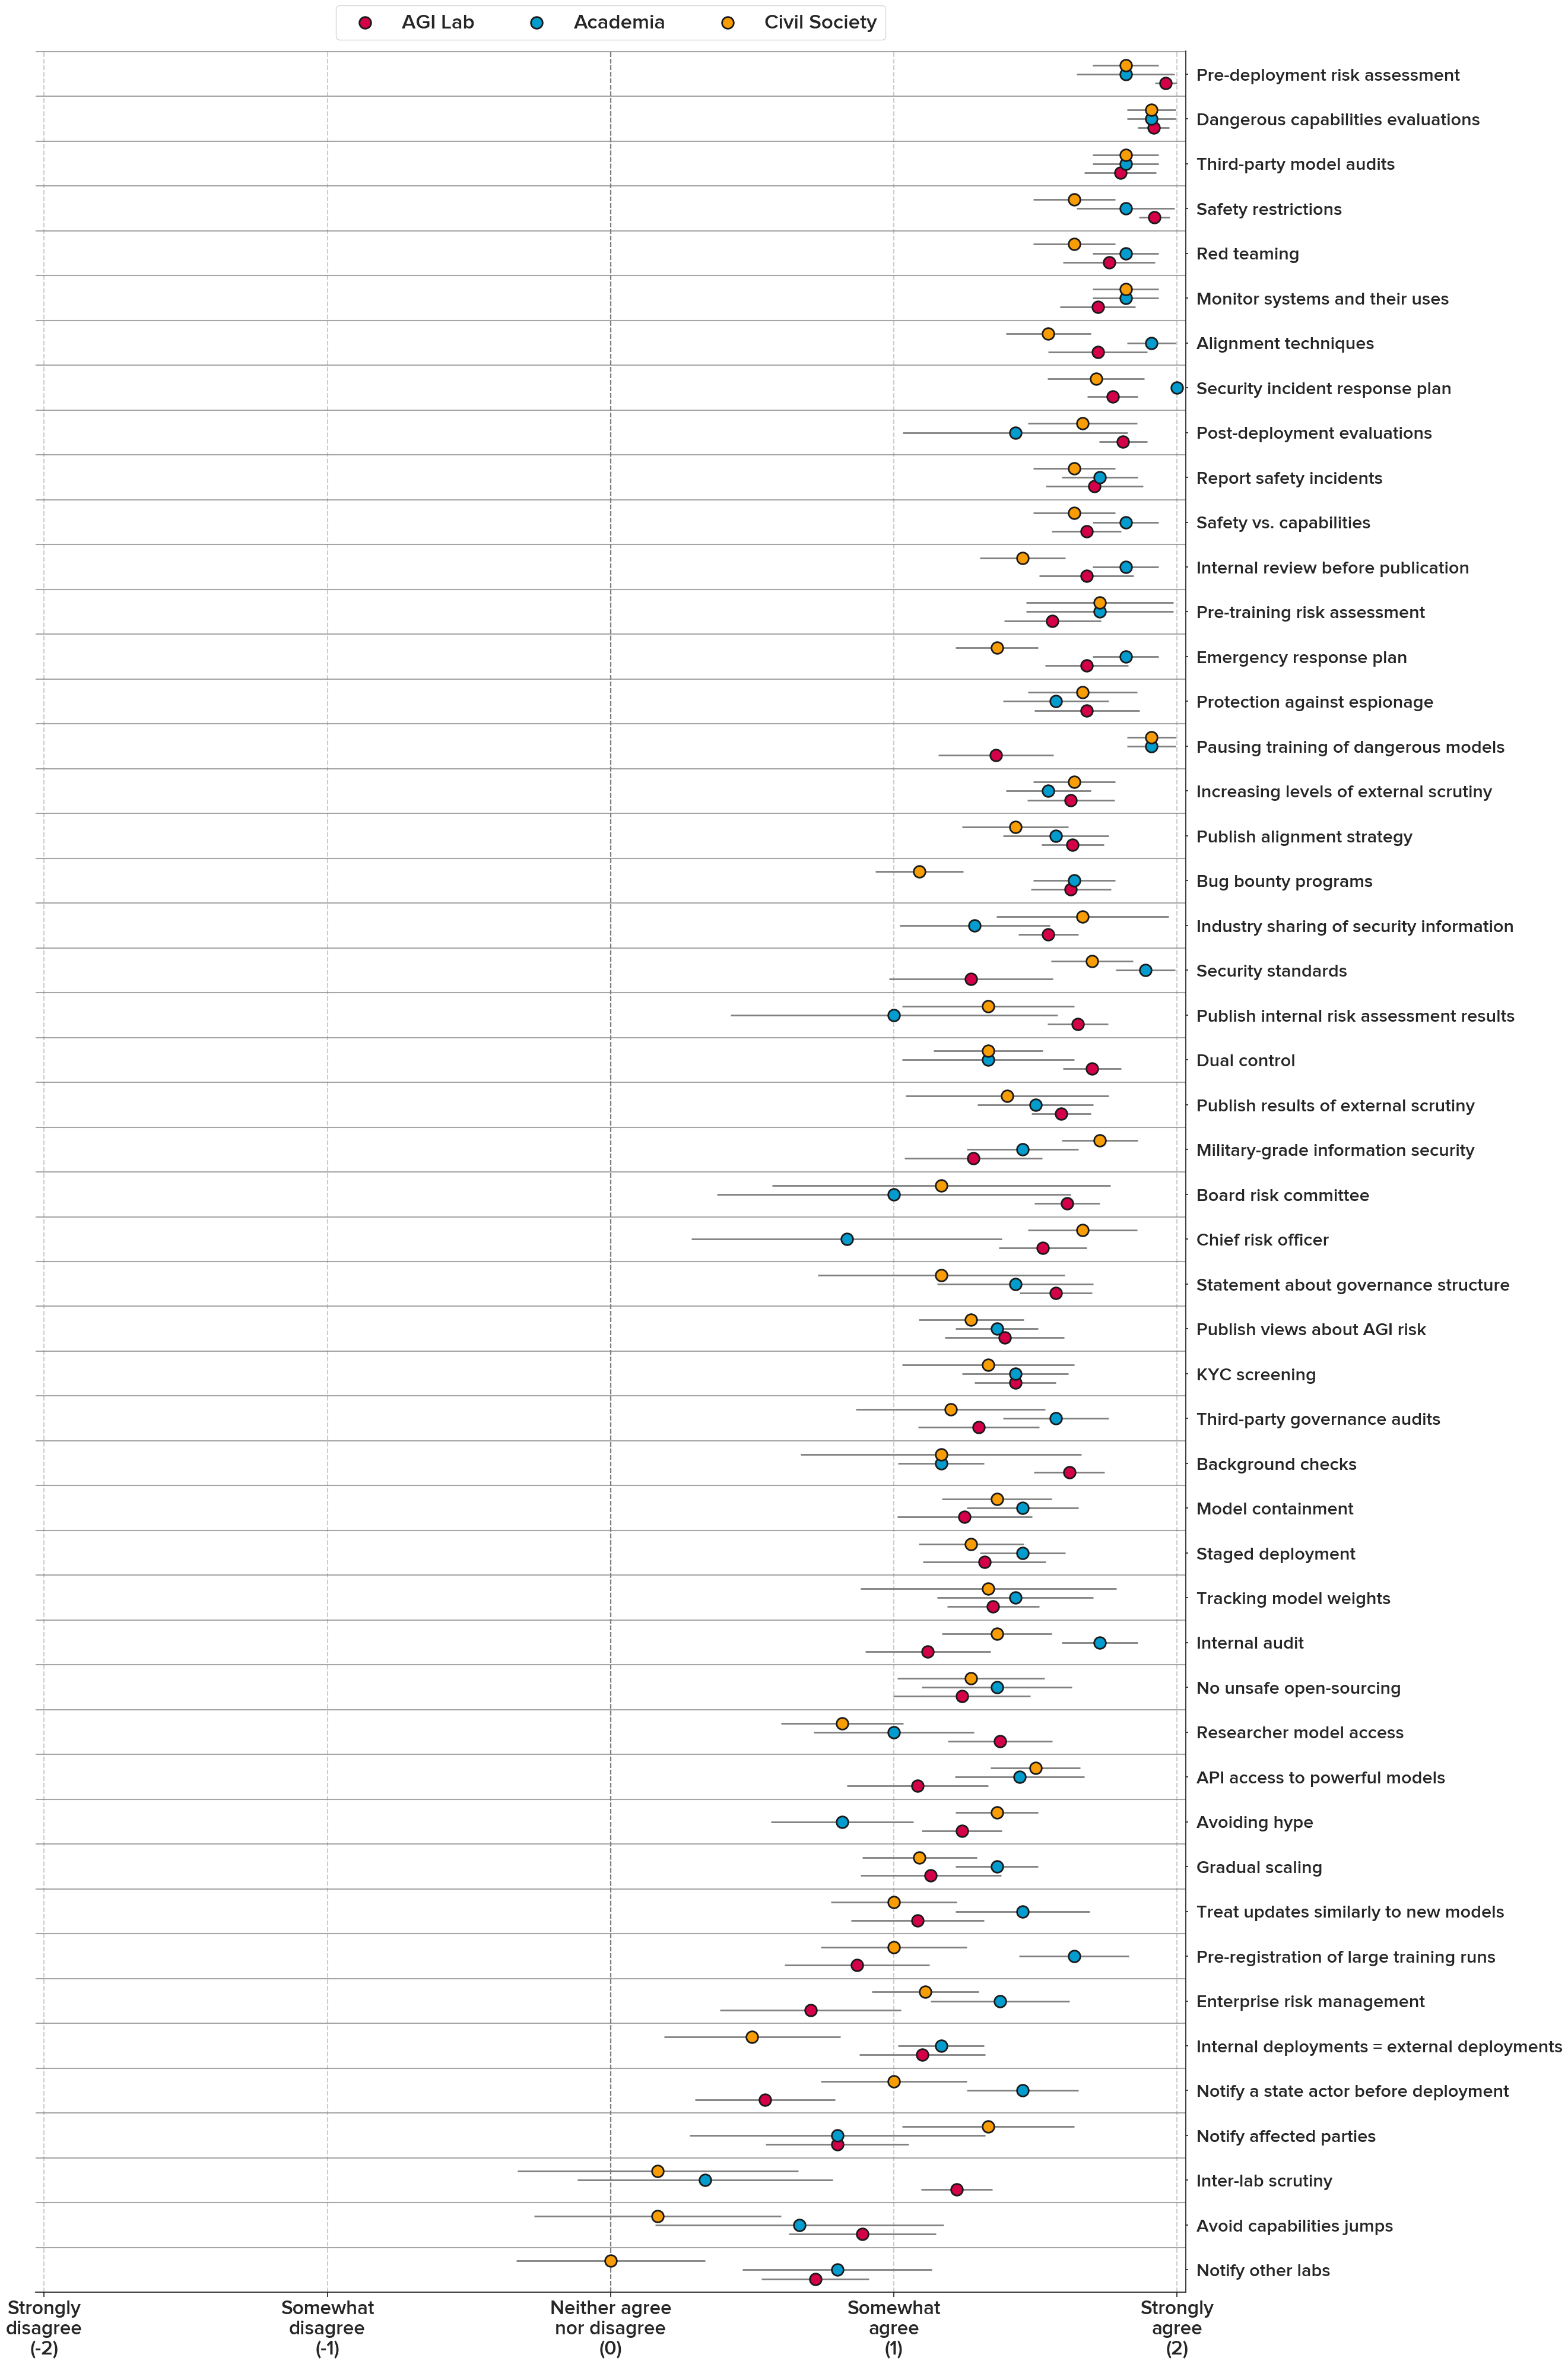

In [34]:
#plt.rcParams['figure.figsize'] = (25, 50)
plt.figure(figsize=(25,50), dpi=100)
offset_ = 0.2
offsets = [-offset_, 0, offset_]
y_positions = np.arange(50)

# Plot data points for agi_lab, academia, and civil_society
colors = ['#d4014a', '#029cce', '#f89d05']
labels = ['AGI Lab', 'Academia', 'Civil Society']
for i, (mean_values, se_values) in enumerate(zip([agi_lab_mean_values_sorted, academia_mean_values_sorted, civil_society_mean_values_sorted],
                                                 [agi_lab_data_se_reordered, academia_data_se_reordered, civil_society_data_se_reordered])):
    plt.scatter(x=mean_values[::-1], y=y_positions + offsets[i],
                c=colors[i], edgecolor="k", linewidth=2, s=200, zorder=10, label=labels[i])

# Add horizontal lines for +/- standard error
for idx, (mean_agi_lab, se_agi_lab, mean_academia, se_academia, mean_civil_society, se_civil_society) in enumerate(zip(agi_lab_mean_values_sorted[::-1], agi_lab_data_se_reordered[::-1],
                                                                                                                      academia_mean_values_sorted[::-1], academia_data_se_reordered[::-1],
                                                                                                                      civil_society_mean_values_sorted[::-1], civil_society_data_se_reordered[::-1])):
    plt.hlines(y=idx - offset_, xmin=mean_agi_lab - se_agi_lab, xmax=mean_agi_lab + se_agi_lab, colors="grey", linewidth=2)
    plt.hlines(y=idx, xmin=mean_academia - se_academia, xmax=mean_academia + se_academia, colors="grey", linewidth=2)
    plt.hlines(y=idx + offset_, xmin=mean_civil_society - se_civil_society, xmax=mean_civil_society + se_civil_society, colors="grey", linewidth=2)

# Add faint grey boxes around the scattered points and y-tick labels
ax = plt.gca()
#for idx in y_positions:
    #rect = patches.Rectangle((-2.1, idx - 0.4), 4.2, 0.8, linewidth=1, edgecolor='gray', facecolor='none', alpha=0.3)
    #ax.add_patch(rect)
    
plt.xlim(-2.02, 2.02)
plt.axvline(0, c="k", linestyle="--")
plt.axvline(-2, c="grey", linestyle="--", alpha=0.4)
plt.axvline(-1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(2, c="grey", linestyle="--", alpha=0.4)
for i in range(51):
    plt.axhline(i-0.5, c="grey", alpha=0.7)

plt.xlim(-2.03, 2.03)
plt.axvline(0, c="grey", linestyle="--")

gov_mechanism_titles = generate_gov_mechanisms_labels()
gov_mechanism_titles_ordered_full = [gov_mechanism_titles[idx] for idx in sector_means_for_ranking_idx_sorted_idx][::-1]

x_labels = ["Strongly\ndisagree\n(-2)", "Somewhat\ndisagree\n(-1)", "Neither agree\nnor disagree\n(0)", \
            "Somewhat\nagree\n(1)", "Strongly\nagree\n(2)"]
plt.xticks(np.arange(-2,3), x_labels, fontproperties=prop_bold, fontsize=24)

# Add slight ticks to x-axis and y-axis
ax = plt.gca()
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False)

plt.ylim(-0.5,49.51)

# Custom y-tick parameters
#plt.tick_params(axis='y', which='both', right=True, labelright=True, left=False, labelleft=False, length=3, pad=10)
plt.tick_params(axis='y', which='both', right=True, labelright=True, \
                    left=True, labelleft=False, length=3, pad=10)

gov_mechanism_titles_reordered = [gov_mechanism_titles[idx] for idx in sector_means_for_ranking_idx_sorted_idx][::-1]

# Set y-tick labels to the right of the plot
# Set y-tick labels to the right of the plot

gov_mechanism_titles_reordered_space_save = [
    'Internal deployments = external deployments' 
    if title == 'Treat internal deployments similar to external deployments' 
    else 'Publish internal risk assessment results' 
    if title == 'Publish results of internal risk assessments' 
    else "No unsafe open-sourcing"
    if title == "No open-sourcing"
    else title 
    for title in gov_mechanism_titles_reordered
    ]

ax.set_yticks(range(len(gov_mechanism_titles_reordered_space_save)))
ax.set_yticklabels(gov_mechanism_titles_reordered_space_save, ha='left', fontproperties=prop_bold, fontsize=22)

sns.despine(left=True, right=False) 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.025), ncol=3, \
          prop={'fname':'/Users/mccaffary/Desktop/proxima_nova/Proxima_Nova_Semibold.otf', 'size':'25'})
#plt.savefig("figure_6.pdf", dpi=1000, bbox_inches = 'tight')

plt.show()


# • Figure 7 pre-processing and visualisation:

In [35]:
everyone_else_idx = academia_idx + civil_society_idx

# Create NumPy arrays for each group using the provided indices
agi_lab_data = array_50_x_n[:, agi_lab_idx]
everyone_else_data = array_50_x_n[:, everyone_else_idx]

agi_lab_data = np.where(agi_lab_data == 3, np.nan, agi_lab_data)
everyone_else_data = np.where(everyone_else_data == 3, np.nan, everyone_else_data)



# Calculate the mean values for each group, ignoring the np.nan values
agi_lab_mean_values = np.nanmean(agi_lab_data, axis=1)
everyone_else_mean_values = np.nanmean(everyone_else_data, axis=1)


# Calculate the mean of the mean values for each group
agi_lab_mean_of_means = np.nanmean(agi_lab_mean_values)
everyone_else_mean_of_means = np.nanmean(everyone_else_mean_values)


# Combine the mean of means into a single list
mean_of_means = [
    agi_lab_mean_of_means,
    everyone_else_mean_of_means
]

agi_lab_mean_values_list = agi_lab_mean_values.tolist()
everyone_else_mean_values_list = everyone_else_mean_values.tolist()

sector_means_for_ranking_ = np.mean(np.vstack((agi_lab_mean_values_list, \
                                       everyone_else_mean_values_list)), axis=0).tolist()

sector_means_for_ranking_idx = list(zip(np.arange(len(sector_means_for_ranking_)), sector_means_for_ranking_))
sector_means_for_ranking_idx_sorted = sorted(sector_means_for_ranking_idx, key=lambda x: x[1])[::-1]
#sector_means_for_ranking_idx_sorted_idx = [elem[0] for elem in sector_means_for_ranking_idx_sorted]
#sector_means_for_ranking_idx_sorted_idx = [elem[0] for elem in sector_means_for_ranking_idx_sorted]
sector_means_for_ranking_idx_sorted_idx = gov_mechanisms_means_full_idx_

# Reorder the mean values lists using the specified indices
agi_lab_mean_values_sorted = [agi_lab_mean_values_list[i] for i in \
                              sector_means_for_ranking_idx_sorted_idx]

everyone_else_mean_values_sorted = [everyone_else_mean_values_list[i] for i in \
                              sector_means_for_ranking_idx_sorted_idx]

agi_lab_data_se = compute_standard_errors_(agi_lab_data).tolist()
everyone_else_data_se = compute_standard_errors_(everyone_else_data).tolist()

agi_lab_data_se_reordered = [agi_lab_data_se[i] for i in sector_means_for_ranking_idx_sorted_idx]
everyone_else_data_se_reordered = [everyone_else_data_se[i] for i in sector_means_for_ranking_idx_sorted_idx]


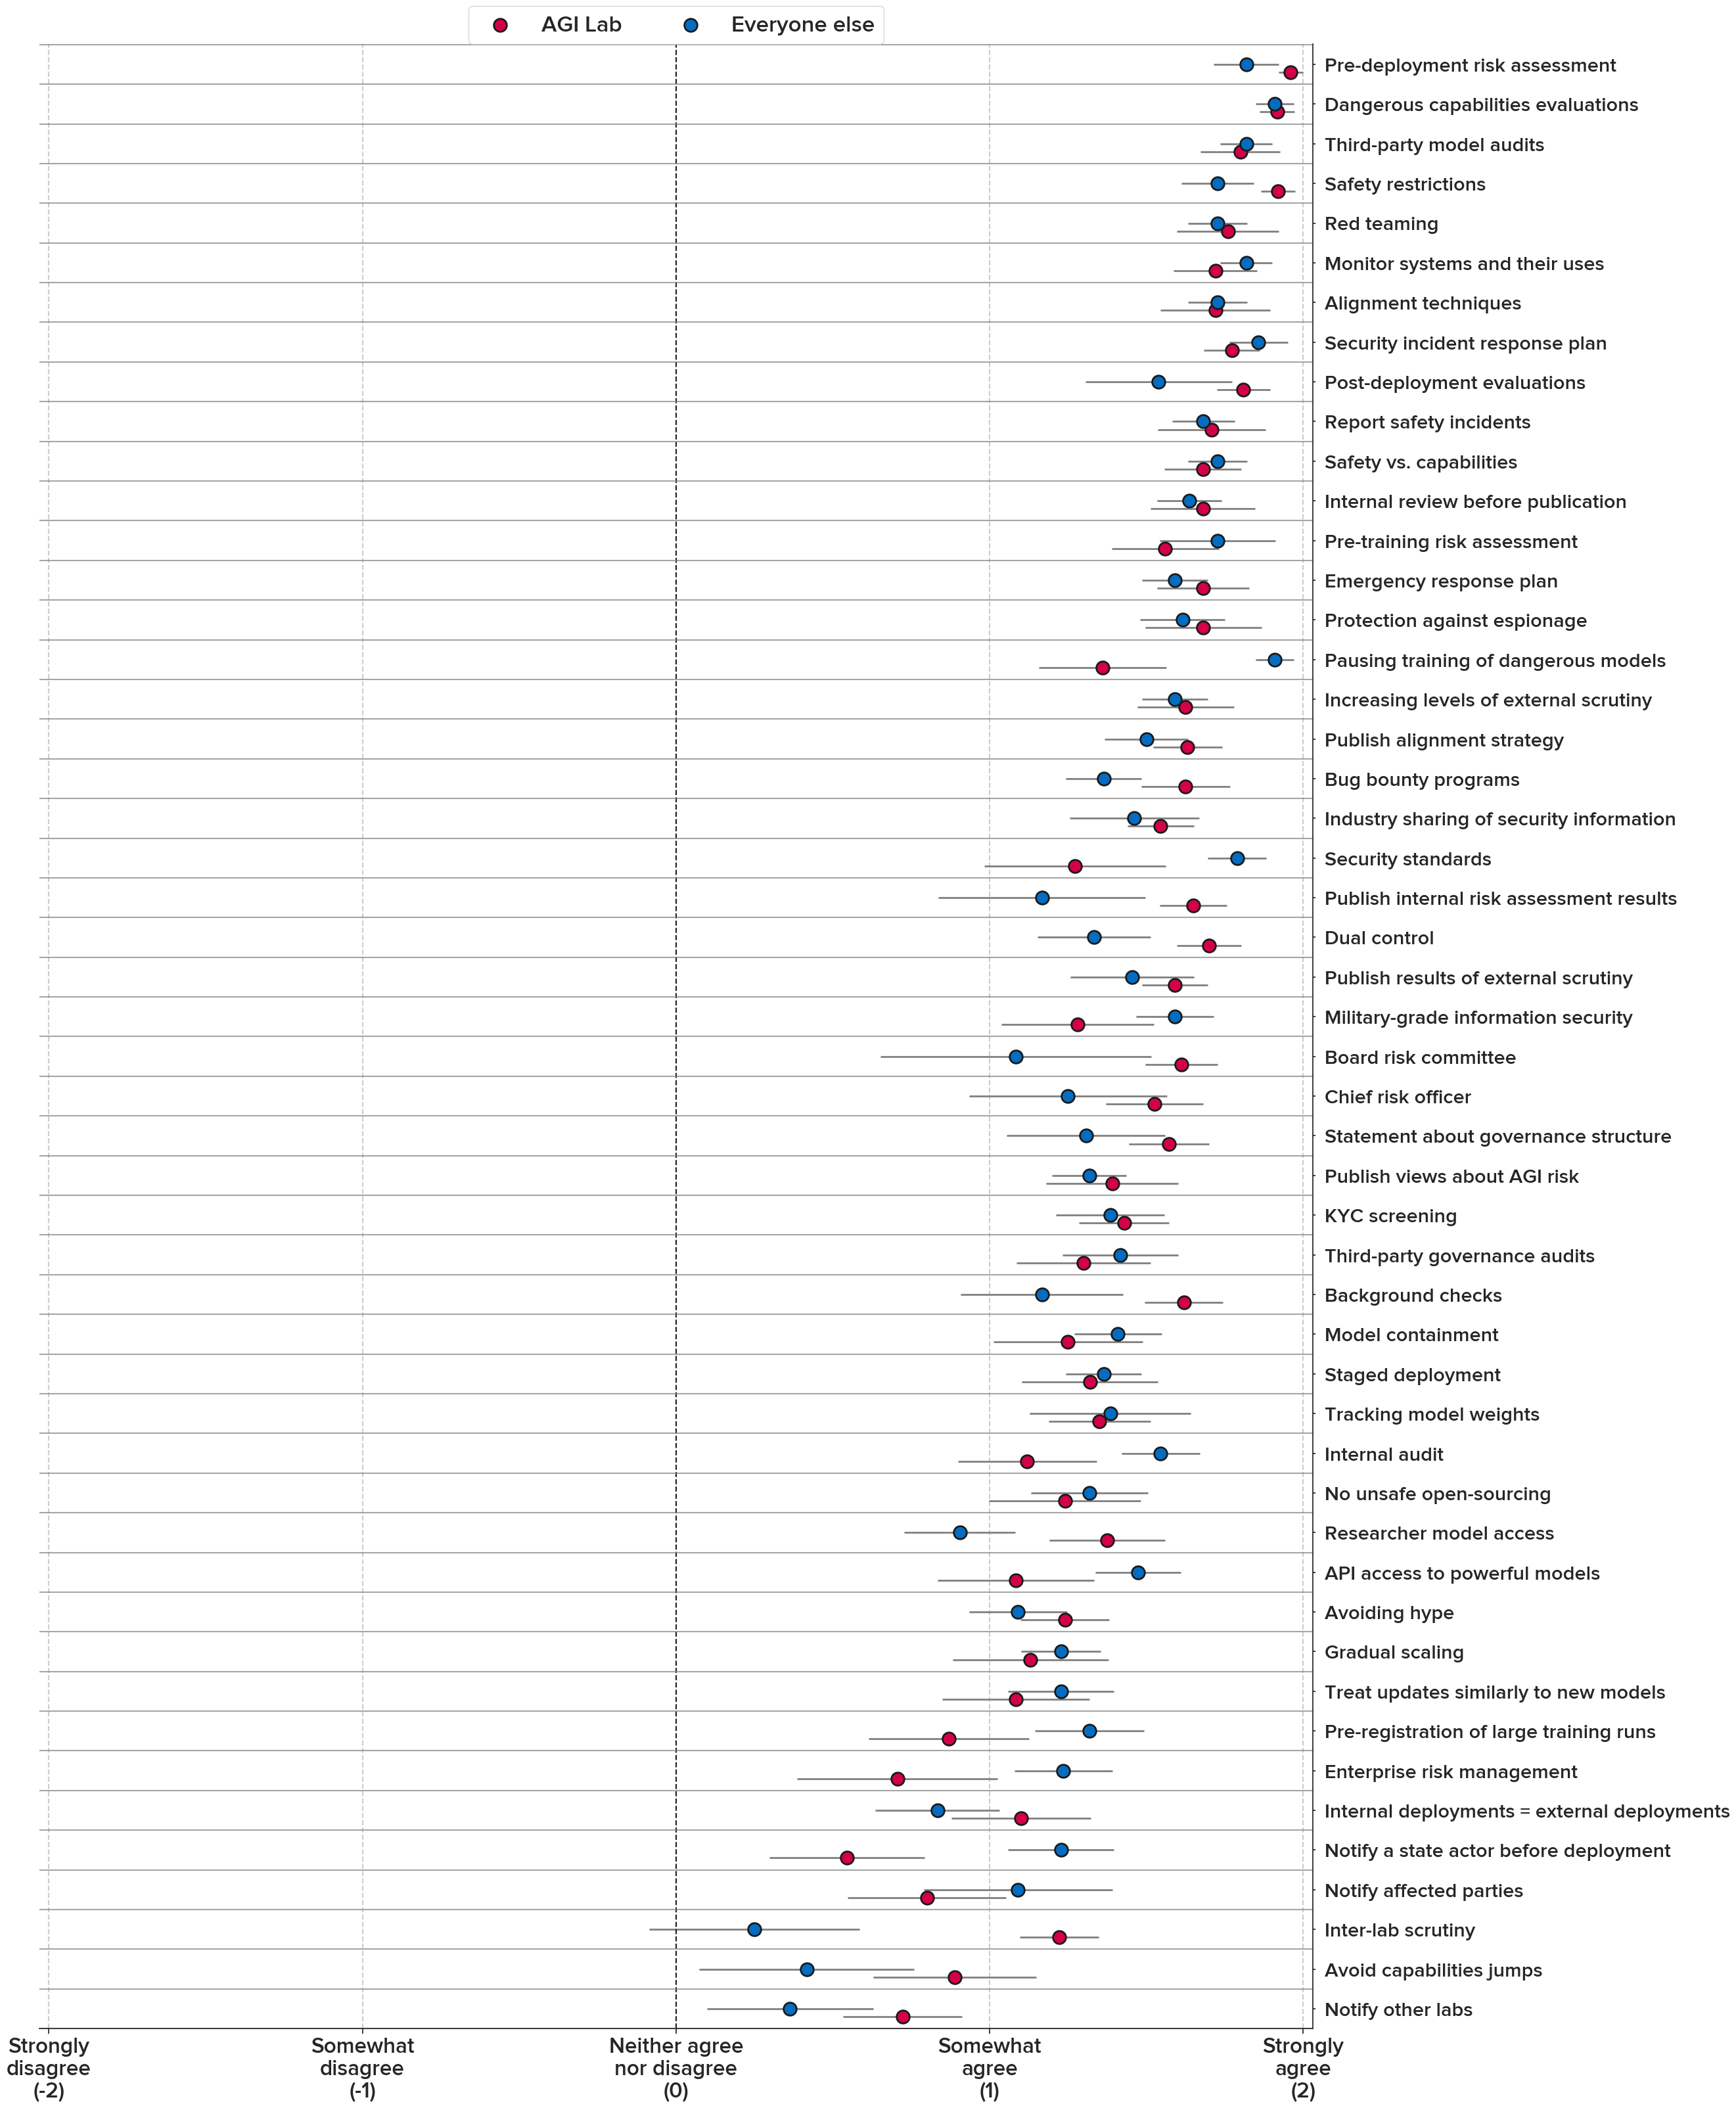

In [36]:
#plt.rcParams['figure.figsize'] = (25, 40)
plt.figure(figsize=(25,40), dpi=100)
offset_ = 0.2
offsets = [-offset_, 0]

y_positions = np.arange(50)

# Plot data points for agi_lab and everyone_else
colors = ['#d4014a', '#046dc2']
labels = ['AGI Lab', 'Everyone else']

for i, (mean_values, se_values) in enumerate(zip([agi_lab_mean_values_sorted, everyone_else_mean_values_sorted],
                                                 [agi_lab_data_se_reordered, everyone_else_data_se_reordered])):
    plt.scatter(x=mean_values[::-1], y=y_positions + offsets[i],
                c=colors[i], edgecolor="k", linewidth=2, s=200, zorder=10, label=labels[i])

# Add horizontal lines for +/- standard error
for idx, (mean_agi_lab, se_agi_lab, mean_everyone_else, se_everyone_else) in enumerate(zip(agi_lab_mean_values_sorted[::-1], agi_lab_data_se_reordered[::-1],
                                                                                          everyone_else_mean_values_sorted[::-1], everyone_else_data_se_reordered[::-1])):
    plt.hlines(y=idx - offset_, xmin=mean_agi_lab - se_agi_lab, xmax=mean_agi_lab + se_agi_lab, colors="grey", linewidth=2)
    plt.hlines(y=idx, xmin=mean_everyone_else - se_everyone_else, xmax=mean_everyone_else + se_everyone_else, colors="grey", linewidth=2)

# Add faint grey boxes around the scattered points and y-tick labels
ax = plt.gca()
#for idx in y_positions:
    #rect = patches.Rectangle((-2.1, idx - 0.4), 4.2, 0.8, linewidth=1, edgecolor='gray', facecolor='none', alpha=0.3)
    #ax.add_patch(rect)

plt.xlim(-2.02, 2.02)
plt.axvline(0, c="k", linestyle="--")
plt.axvline(-2, c="grey", linestyle="--", alpha=0.4)
plt.axvline(-1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(2, c="grey", linestyle="--", alpha=0.4)
for i in range(51):
    plt.axhline(i-0.5, c="grey", alpha=0.7)

plt.xlim(-2.03, 2.03)

gov_mechanism_titles = generate_gov_mechanisms_labels()
gov_mechanism_titles_ordered_full = [gov_mechanism_titles[idx] for idx in sector_means_for_ranking_idx_sorted_idx][::-1]

x_labels = ["Strongly\ndisagree\n(-2)", "Somewhat\ndisagree\n(-1)", "Neither agree\nnor disagree\n(0)", \
            "Somewhat\nagree\n(1)", "Strongly\nagree\n(2)"]
plt.xticks(np.arange(-2,3), x_labels, fontproperties=prop_bold, fontsize=24)

# Add slight ticks to x-axis and y-axis
ax = plt.gca()
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False)

plt.ylim(-0.5,49.51)

# Custom y-tick parameters
#plt.tick_params(axis='y', which='both', right=True, labelright=True, left=False, labelleft=False, length=3, pad=10)
plt.tick_params(axis='y', which='both', right=True, labelright=True, \
                    left=True, labelleft=False, length=3, pad=10)



gov_mechanism_titles_reordered = [gov_mechanism_titles[idx] for idx in sector_means_for_ranking_idx_sorted_idx][::-1]


gov_mechanism_titles_reordered_space_save = [
    'Internal deployments = external deployments' 
    if title == 'Treat internal deployments similar to external deployments' 
    else 'Publish internal risk assessment results' 
    if title == 'Publish results of internal risk assessments' 
    else "No unsafe open-sourcing"
    if title == "No open-sourcing"
    else title 
    for title in gov_mechanism_titles_reordered
    ]

ax.set_yticks(range(len(gov_mechanism_titles_reordered_space_save)))
ax.set_yticklabels(gov_mechanism_titles_reordered_space_save, ha='left', fontproperties=prop_bold, fontsize=22)

sns.despine(left=True, right=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.025), ncol=2, \
          prop={'fname':'/Users/mccaffary/Desktop/proxima_nova/Proxima_Nova_Semibold.otf', 'size':'25'})
#plt.savefig("figure_7.png", dpi=1000, bbox_inches = 'tight')

plt.show()


# • Figure 8 pre-processing and visualisation:

In [37]:
gov_mechanisms_se_man = compute_gov_mechanism_standard_error(gov_mechanisms_filtered_responses_full_man)
gov_mechanisms_se_man_idx = list(zip([int(i) for i in range(len(gov_mechanisms_se_man))], \
                                   gov_mechanisms_se_man))

gov_mechanisms_se_woman = compute_gov_mechanism_standard_error(gov_mechanisms_filtered_responses_full_woman)
gov_mechanisms_se_woman_idx = list(zip([int(i) for i in range(len(gov_mechanisms_se_woman))], \
                                   gov_mechanisms_se_woman))

gov_mechanisms_filtered_responses_full_man_removed = [[elem for elem in sublist if (elem != 3)] for sublist in gov_mechanisms_filtered_responses_full_man]
gov_mechanisms_filtered_responses_full_woman_removed = [[elem for elem in sublist if (elem != 3)] for sublist in gov_mechanisms_filtered_responses_full_woman]




gov_mechanisms_mean_man = [np.mean(sublist) for sublist in gov_mechanisms_filtered_responses_full_man_removed]
gov_mechanisms_mean_woman = [np.mean(sublist) for sublist in gov_mechanisms_filtered_responses_full_woman_removed]

gov_mechanisms_mean_man_idx = list(zip(np.arange(50), gov_mechanisms_mean_man))
gov_mechanisms_mean_woman_idx = list(zip(np.arange(50), gov_mechanisms_mean_woman))

gov_mechanisms_mean_man_woman = np.vstack((gov_mechanisms_mean_man, gov_mechanisms_mean_woman)).tolist()
gov_mechanisms_mean_man_woman_ = np.mean(gov_mechanisms_mean_man_woman, axis=0).tolist()
gov_mechanisms_mean_man_woman_idx = list(zip(np.arange(50), gov_mechanisms_mean_man_woman_))
gov_mechanisms_mean_man_woman_idx_sorted = sorted(gov_mechanisms_mean_man_woman_idx, key=lambda x: x[1])[::-1]
#gov_mechanisms_mean_man_woman_idx_sorted_idx = [elem[0] for elem in gov_mechanisms_mean_man_woman_idx_sorted]
gov_mechanisms_mean_man_woman_idx_sorted_idx = gov_mechanisms_means_full_idx_

# Rearrange the elements in mean lists
gov_mechanisms_mean_man_sorted = [
    gov_mechanisms_mean_man[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx
]
gov_mechanisms_mean_woman_sorted = [
    gov_mechanisms_mean_woman[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx
]

# Rearrange the elements in error lists
gov_mechanisms_se_man_sorted = [
    gov_mechanisms_se_man[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx
]
gov_mechanisms_se_woman_sorted = [
    gov_mechanisms_se_woman[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx
]



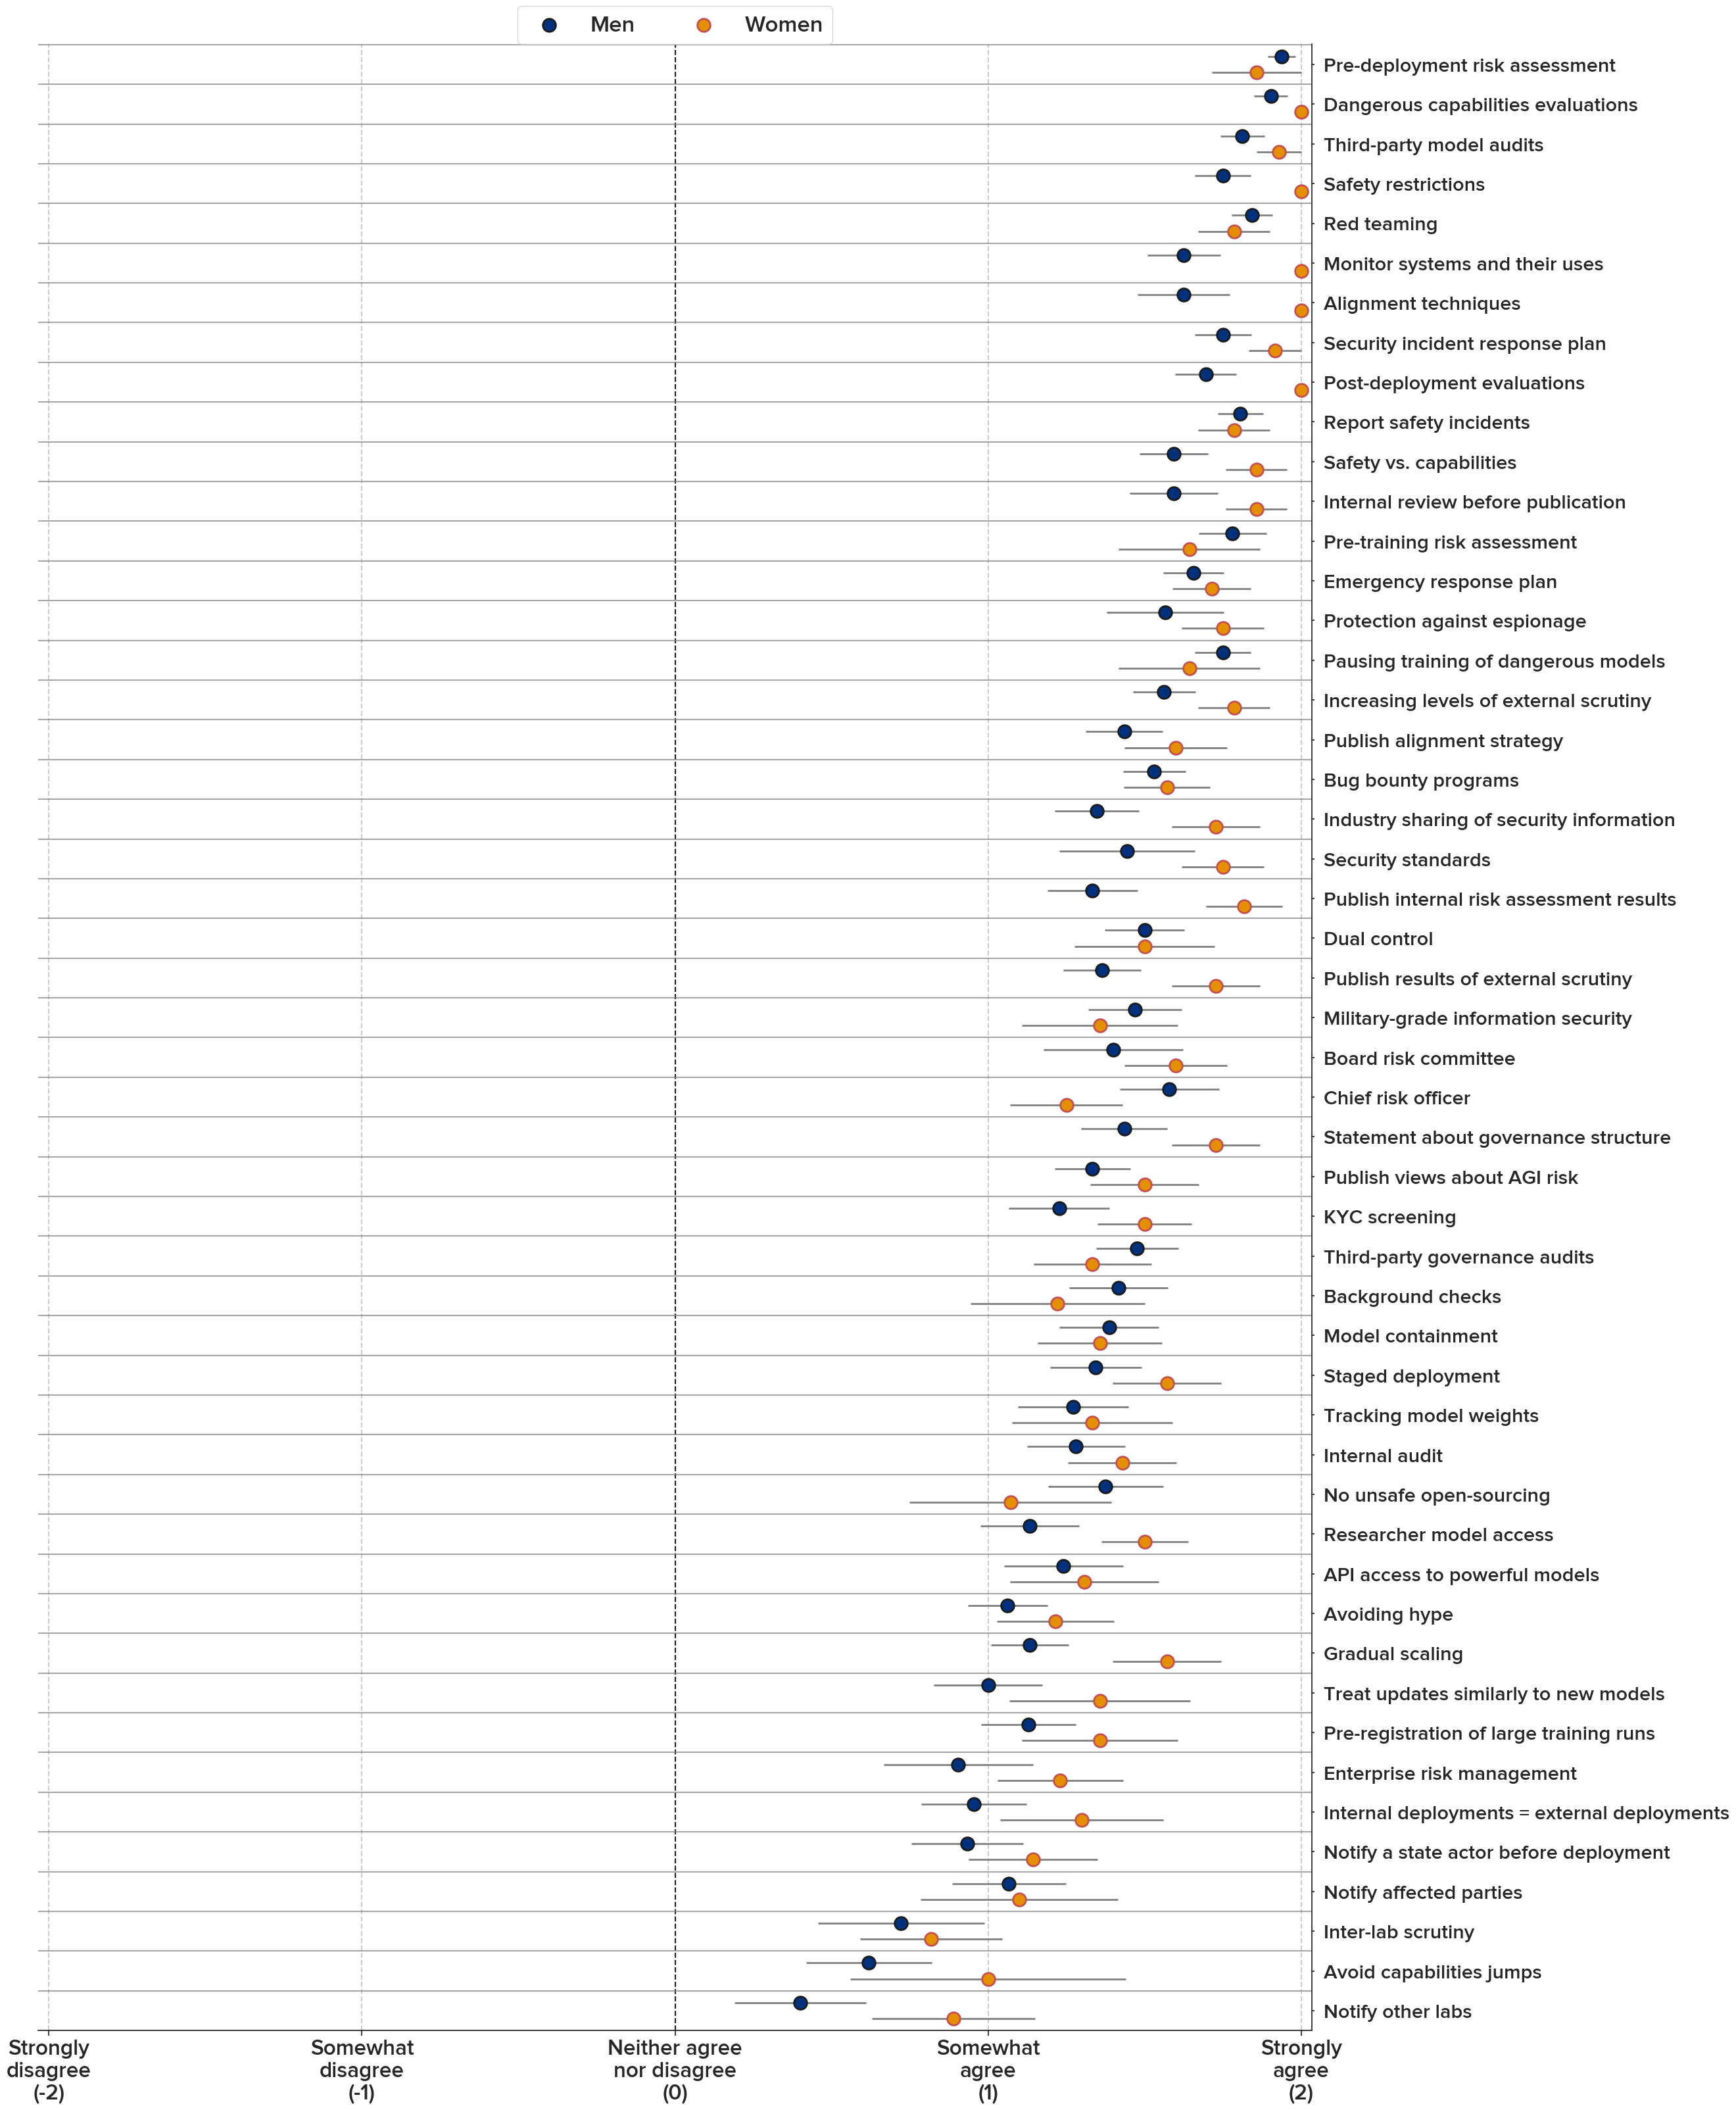

In [38]:
#plt.rcParams['figure.figsize'] = (25, 40)
plt.figure(figsize=(25,40), dpi=100)

cmap_ = discretise_cmap(cmap="Blues", n=len(gov_mechanisms_mean_man_sorted))
cmap_woman = discretise_cmap(cmap="Reds", n=len(gov_mechanisms_mean_man_sorted))

offset_ = 0.2

y_positions = np.arange(len(gov_mechanisms_mean_man_sorted[::-1]))
plt.scatter(x=gov_mechanisms_mean_man_sorted[::-1], y=y_positions + offset_, \
            c="#00317d", edgecolor="k", linewidth=2, s=200, zorder=10, label="Men")

plt.scatter(x=gov_mechanisms_mean_woman_sorted[::-1], y=y_positions - offset_, \
            c="#e48f00", edgecolor="r", linewidth=2, s=200, zorder=10, label="Women")

# Add horizontal lines for +/- standard error
for idx, (mean_man, se_man, mean_woman, se_woman) in enumerate(zip(gov_mechanisms_mean_man_sorted[::-1], gov_mechanisms_se_man_sorted[::-1], gov_mechanisms_mean_woman_sorted[::-1], gov_mechanisms_se_woman_sorted[::-1])):
    plt.hlines(y=idx + offset_, xmin=mean_man - se_man, xmax=mean_man + se_man, \
               colors="grey", linewidth=2)
    plt.hlines(y=idx - offset_, xmin=mean_woman - se_woman, xmax=mean_woman + se_woman, \
               colors="grey", linewidth=2)

# Add faint grey boxes around the scattered points and y-tick labels
ax = plt.gca()
#for idx in y_positions:
    #rect = patches.Rectangle((-2.1, idx - 0.4), 4.2, 0.8, linewidth=1, edgecolor='gray', facecolor='none', alpha=0.3)
    #ax.add_patch(rect)

plt.xlim(-2.02, 2.02)
plt.axvline(0, c="k", linestyle="--")
plt.axvline(-2, c="grey", linestyle="--", alpha=0.4)
plt.axvline(-1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(1, c="grey", linestyle="--", alpha=0.4)
plt.axvline(2, c="grey", linestyle="--", alpha=0.4)
for i in range(51):
    plt.axhline(i-0.5, c="grey", alpha=0.7)

plt.xlim(-2.035, 2.035)

gov_mechanism_titles = generate_gov_mechanisms_labels()
gov_mechanism_titles_ordered_full = [gov_mechanism_titles[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx][::-1]

x_labels = ["Strongly\ndisagree\n(-2)", "Somewhat\ndisagree\n(-1)", "Neither agree\nnor disagree\n(0)", \
            "Somewhat\nagree\n(1)", "Strongly\nagree\n(2)"]
plt.xticks(np.arange(-2,3), x_labels, fontproperties=prop_bold, fontsize=24)

# Add slight ticks to x-axis and y-axis
ax = plt.gca()
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
#ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False)

plt.ylim(-0.5,49.51)

# Custom y-tick parameters
#plt.tick_params(axis='y', which='both', right=True, labelright=True, left=False, labelleft=False, length=3, pad=10)
plt.tick_params(axis='y', which='both', right=True, labelright=True, \
                    left=True, labelleft=False, length=3, pad=10)

# Set y-tick labels to the right of the plot

gov_mechanism_titles = generate_gov_mechanisms_labels()
gov_mechanism_titles_reordered = [gov_mechanism_titles[idx] for idx in gov_mechanisms_mean_man_woman_idx_sorted_idx][::-1]

gov_mechanism_titles_reordered_space_save = [
    'Internal deployments = external deployments' 
    if title == 'Treat internal deployments similar to external deployments' 
    else 'Publish internal risk assessment results' 
    if title == 'Publish results of internal risk assessments' 
    else "No unsafe open-sourcing"
    if title == "No open-sourcing"
    else title 
    for title in gov_mechanism_titles_reordered
    ]

ax.set_yticks(range(len(gov_mechanism_titles_reordered_space_save)))
ax.set_yticklabels(gov_mechanism_titles_reordered_space_save, ha='left', fontproperties=prop_bold, fontsize=22)


sns.despine(left=True, right=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.025), ncol=2, \
          prop={'fname':'/Users/mccaffary/Desktop/proxima_nova/Proxima_Nova_Semibold.otf', 'size':'25'})
#plt.savefig("figure_8.pdf", dpi=1000, bbox_inches = 'tight')
plt.show()



# • Tables (n.b. – will require rendering in LaTeX):

## • Table 1:

In [39]:
latex_table = generate_latex_table_1(gov_mechanisms_filtered_responses, gov_mechanism_titles)

# output the LaTeX table
print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{rotating}

\begin{document}

\begin{sidewaystable}
\fontsize{10}{12}\selectfont
\centering
\begin{tabular}{l *{11}{r}}
\toprule
\textbf{AGI safety and} & \textbf{Strongly} & \textbf{Somewhat} & \textbf{Neither agree} & \textbf{Somewhat} & \textbf{Strongly} & \textbf{I don't} & & & \\
\textbf{governance practice} & \textbf{disagree (-2)} & \textbf{disagree (-1)} & \textbf{nor disagree (0)} & \textbf{agree (1)} & \textbf{agree (2)} & \textbf{know (-88)} & \textbf{Total disagreement} & \textbf{Total agreement} & \textbf{n} \\
\midrule
Alignment techniques & 1 & 0 & 1 & 7 & 42 & 0 & 1 & 49 & 51 \\
Pre-registration of large training runs & 2 & 3 & 4 & 21 & 19 & 2 & 5 & 40 & 51 \\
Gradual scaling & 2 & 0 & 6 & 21 & 20 & 2 & 2 & 41 & 51 \\
Dangerous capabilities evaluations & 0 & 0 & 0 & 6 & 44 & 1 & 0 & 50 & 51 \\
Pausing training of dangerous models & 1 & 1 & 2 & 9 & 38 & 0 & 2 & 47 & 51 \\
Staged deployment & 2 & 0 & 2 & 22 & 25 & 0

## • Table 2:

In [40]:
latex_table = generate_latex_table_2(gov_mechanisms_filtered_responses, gov_mechanism_titles)

# output the LaTeX table
print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{rotating}

\begin{document}

\begin{sidewaystable}
\fontsize{10}{12}\selectfont
\centering
\begin{tabular}{l *{11}{r}}
\toprule
\textbf{AGI safety and} & \textbf{Strongly} & \textbf{Somewhat} & \textbf{Neither agree} & \textbf{Somewhat} & \textbf{Strongly} & \textbf{I don't} & & & \\
\textbf{governance practice} & \textbf{disagree (-2)} & \textbf{disagree (-1)} & \textbf{nor disagree (0)} & \textbf{agree (1)} & \textbf{agree (2)} & \textbf{know (-88)} & \textbf{Total disagreement} & \textbf{Total agreement} & \textbf{n} \\
\midrule
Alignment techniques & 2.0\% & 0.0\% & 2.0\% & 13.7\% & 82.4\% & 0.0\% & 2.0\% & 96.1\% & 51 \\
Pre-registration of large training runs & 3.9\% & 5.9\% & 7.8\% & 41.2\% & 37.3\% & 3.9\% & 9.8\% & 78.4\% & 51 \\
Gradual scaling & 3.9\% & 0.0\% & 11.8\% & 41.2\% & 39.2\% & 3.9\% & 3.9\% & 80.4\% & 51 \\
Dangerous capabilities evaluations & 0.0\% & 0.0\% & 0.0\% & 11.8\% & 86.3\% & 2.0\% & 0.0\% & 98.0\%

## • Table 3:

In [41]:
import scipy.stats as stats

gov_mechanisms_filtered_responses_dont_know_remove = [[elem for elem in sublist if (elem != 3)] for \
                                                      sublist in gov_mechanisms_filtered_responses]

In [42]:
import scipy.stats as stats

gov_mechanisms_filtered_responses_dont_know_remove = [[elem for elem in sublist if (elem != 3)] for \
                                                      sublist in gov_mechanisms_filtered_responses]


data = gov_mechanisms_filtered_responses_dont_know_remove

# Print the header
print("Sublist | Title             | Mean | Median | Standard Error | Variance | First Quartile | Third Quartile | Inter-quartile Range | Length")

# Iterate over the sublists
for i, (sublist, title) in enumerate(zip(data, gov_mechanism_titles)):
    mean = np.mean(sublist)
    median = np.median(sublist)
    std_error = stats.sem(sublist)
    variance = np.var(sublist, ddof=1)
    first_quartile = np.percentile(sublist, 25)
    third_quartile = np.percentile(sublist, 75)
    iqr = third_quartile - first_quartile
    length = len(sublist)

    # Print the results in a readable format
    print(f"{i + 1:3} | {title:15} | {mean:5.2f} | {median:5.2f} | {std_error:5.2f} | {variance:5.2f} | {first_quartile:5.2f} | {third_quartile:5.2f} | {iqr:5.2f} | {length:3}")
    print("\n")


Sublist | Title             | Mean | Median | Standard Error | Variance | First Quartile | Third Quartile | Inter-quartile Range | Length
  1 | Alignment techniques |  1.75 |  2.00 |  0.10 |  0.47 |  2.00 |  2.00 |  0.00 |  51


  2 | Pre-registration of large training runs |  1.06 |  1.00 |  0.15 |  1.10 |  1.00 |  2.00 |  1.00 |  49


  3 | Gradual scaling |  1.16 |  1.00 |  0.13 |  0.89 |  1.00 |  2.00 |  1.00 |  49


  4 | Dangerous capabilities evaluations |  1.88 |  2.00 |  0.05 |  0.11 |  2.00 |  2.00 |  0.00 |  50


  5 | Pausing training of dangerous models |  1.61 |  2.00 |  0.12 |  0.68 |  1.50 |  2.00 |  0.50 |  51


  6 | Staged deployment |  1.33 |  1.00 |  0.12 |  0.79 |  1.00 |  2.00 |  1.00 |  51


  7 | API access to powerful models |  1.19 |  1.00 |  0.15 |  1.11 |  1.00 |  2.00 |  1.00 |  47


  8 | No open-sourcing |  1.25 |  2.00 |  0.15 |  1.19 |  1.00 |  2.00 |  1.00 |  51


  9 | Safety restrictions |  1.80 |  2.00 |  0.06 |  0.20 |  2.00 |  2.00 |  0.00 |  51


In [43]:
data = gov_mechanisms_filtered_responses_dont_know_remove
titles = gov_mechanism_titles

latex_table = generate_latex_table_3(data, titles)

# output the LaTeX table
print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{rotating}
\usepackage{adjustbox}

\begin{document}
\begin{sidewaystable}
\centering
\fontsize{8}{10}\selectfont
\begin{adjustbox}{width=\textwidth, center}
\begin{tabular}{l r r r r r r r r}
\toprule
\textbf{Title} & \textbf{Mean} & \textbf{Median} & \textbf{Standard Error} & \textbf{Variance} & \textbf{First Quartile} & \textbf{Third Quartile} & \textbf{Inter-quartile Range} & \textbf{Length} \\
\midrule
Alignment techniques & 1.75 & 2.00 & 0.10 & 0.47 & 2.00 & 2.00 & 0.00 & 51 \\
Pre-registration of large training runs & 1.06 & 1.00 & 0.15 & 1.10 & 1.00 & 2.00 & 1.00 & 49 \\
Gradual scaling & 1.16 & 1.00 & 0.13 & 0.89 & 1.00 & 2.00 & 1.00 & 49 \\
Dangerous capabilities evaluations & 1.88 & 2.00 & 0.05 & 0.11 & 2.00 & 2.00 & 0.00 & 50 \\
Pausing training of dangerous models & 1.61 & 2.00 & 0.12 & 0.68 & 1.50 & 2.00 & 0.50 & 51 \\
Staged deployment & 1.33 & 1.00 & 0.12 & 0.79 & 1.00 & 2.00 & 1.00 & 51 \\
API access to powerful m

## • Table 4:

In [44]:
agi_lab_data = agi_lab_data
academia_data = academia_data
civil_society_data = civil_society_data
titles = gov_mechanism_titles

fontsize = 8  # Change the font size here
latex_table = generate_latex_table_4(agi_lab_data, academia_data, civil_society_data, titles, fontsize)

# output the LaTeX table
print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{array}
\usepackage{rotating}

\begin{document}

\begin{sidewaystable}
    \centering
    \fontsize{8}{12}\selectfont
    \begin{tabular}{l*{9}{r}}
        \toprule
        & \multicolumn{3}{c}{\textbf{Mean}} & \multicolumn{3}{c}{\textbf{Standard error}} & \multicolumn{3}{c}{\textbf{n}} \\
        \cmidrule(lr){2-4} \cmidrule(lr){5-7} \cmidrule(lr){8-10}
        \textbf{AGI safety and governance practice} & \textbf{AGI Lab} & \textbf{Academia} & \textbf{Civil society} & \textbf{AGI Lab} & \textbf{Academia} & \textbf{Civil society} & \textbf{AGI Lab} & \textbf{Academia} & \textbf{Civil society} \\
        \midrule
        Alignment techniques & 1.72 & 1.91 & 1.55 & 0.18 & 0.09 & 0.16 & 25 & 11 & 11 \\
Pre-registration of large training runs & 0.87 & 1.64 & 1.00 & 0.26 & 0.20 & 0.27 & 25 & 11 & 11 \\
Gradual scaling & 1.13 & 1.36 & 1.09 & 0.25 & 0.15 & 0.21 & 25 & 11 & 11 \\
Dangerous capabilities evaluations & 1.92 & 1.91 & 1.91 &

## • Table 5:

In [45]:
agi_lab_data = array_50_x_n[:, agi_lab_idx]
everyone_else_data = array_50_x_n[:, everyone_else_idx]

agi_lab_data_filter = [[elem for elem in sublist if (elem != 3.0)] for sublist in agi_lab_data.tolist()]
everyone_else_data_filter = [[elem for elem in sublist if (elem != 3.0)] for sublist in everyone_else_data.tolist()]

# Convert the floating-point numbers to integers before moving forward, but check for NaN values first
agi_lab_data_filter_int = [[int(elem) for elem in sublist if not math.isnan(elem)] for sublist in agi_lab_data_filter]
everyone_else_data_filter_int = [[int(elem) for elem in sublist if not math.isnan(elem)] for sublist in everyone_else_data_filter]

agi_lab_data_filter_str = [[str(elem) for elem in sublist] for sublist in agi_lab_data_filter_int]
everyone_else_data_filter_str = [[str(elem) for elem in sublist] for sublist in everyone_else_data_filter_int]

agi_lab_data_nan_filter = [[elem for elem in sublist if (elem != 'nan')] for sublist in agi_lab_data_filter_str]
everyone_else_data_nan_filter = [[elem for elem in sublist if (elem != 'nan')] for sublist in everyone_else_data_filter_str]

agi_lab_data_int = [[int(elem) for elem in sublist] for sublist in agi_lab_data_nan_filter]
everyone_else_data_int = [[int(elem) for elem in sublist] for sublist in everyone_else_data_nan_filter]


In [46]:
agi_lab_data = agi_lab_data_int
everyone_else_data = everyone_else_data_int
titles = gov_mechanism_titles

fontsize = 8  # Change the font size here
latex_table = generate_latex_table_5(agi_lab_data, everyone_else_data, titles, fontsize)

# output the LaTeX table
print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{array}
\usepackage{rotating}

\begin{document}

\begin{sidewaystable}
    \centering
    \fontsize{8}{12}\selectfont
    \begin{tabular}{l*{6}{r}}
        \toprule
        & \multicolumn{2}{c}{\textbf{Mean}} & \multicolumn{2}{c}{\textbf{Standard error}} & \multicolumn{2}{c}{\textbf{n}} \\
        \cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7}
        \textbf{AGI safety and governance practice} & \textbf{AGI Lab} & \textbf{Everyone else} & \textbf{AGI Lab} & \textbf{Everyone else} & \textbf{AGI Lab} & \textbf{Everyone else} \\
        \midrule
        Alignment techniques & 1.72 & 1.73 & 0.18 & 0.10 & 25 & 22 \\
Pre-registration of large training runs & 0.87 & 1.32 & 0.26 & 0.18 & 23 & 22 \\
Gradual scaling & 1.13 & 1.23 & 0.25 & 0.13 & 23 & 22 \\
Dangerous capabilities evaluations & 1.92 & 1.91 & 0.06 & 0.06 & 24 & 22 \\
Pausing training of dangerous models & 1.36 & 1.91 & 0.21 & 0.06 & 25 & 22 \\
Staged deployment & 1

## • Table 6:

In [47]:
gov_mechanisms_filtered_responses_full_man_removed = [[elem for elem in sublist if (elem != 3)] for sublist in gov_mechanisms_filtered_responses_full_man]
gov_mechanisms_filtered_responses_full_woman_removed = [[elem for elem in sublist if (elem != 3)] for sublist in gov_mechanisms_filtered_responses_full_woman]

men_data = gov_mechanisms_filtered_responses_full_man_removed
women_data = gov_mechanisms_filtered_responses_full_woman_removed
titles = gov_mechanism_titles

fontsize = 8
latex_table = generate_latex_table_6(men_data, women_data, titles, fontsize)

# output the LaTeX table
print(latex_table)


\documentclass{article}
\usepackage{booktabs}
\usepackage{array}
\usepackage{rotating}

\begin{document}

\begin{sidewaystable}
    \centering
    \fontsize{8}{12}\selectfont
    \begin{tabular}{l*{6}{r}}
        \toprule
        & \multicolumn{2}{c}{\textbf{Mean}} & \multicolumn{2}{c}{\textbf{Standard error}} & \multicolumn{2}{c}{\textbf{n}} \\
        \cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7}
        \textbf{AGI safety and governance practice} & \textbf{Men} & \textbf{Women} & \textbf{Men} & \textbf{Women} & \textbf{Men} & \textbf{Women} \\
        \midrule
        Alignment techniques & 1.62 & 2.00 & 0.15 & 0.00 & 32 & 14 \\
Pre-registration of large training runs & 1.13 & 1.36 & 0.15 & 0.25 & 31 & 14 \\
Gradual scaling & 1.13 & 1.57 & 0.12 & 0.17 & 30 & 14 \\
Dangerous capabilities evaluations & 1.90 & 2.00 & 0.05 & 0.00 & 31 & 14 \\
Pausing training of dangerous models & 1.75 & 1.64 & 0.09 & 0.23 & 32 & 14 \\
Staged deployment & 1.34 & 1.57 & 0.15 & 0.17 & 32 & 14 \

## • Table 7:

In [48]:
gender_responses_ = series2list(label_data["gender"])[2:]
gender_responses_str = [str(elem) for elem in gender_responses_]
gender_responses_nan_filter = [elem for elem in gender_responses_str if (elem != "nan")]

data = gender_responses_nan_filter

# Count the unique string elements
counts = Counter(data)

# Calculate the total number of elements
total = len(data)

# Calculate the percentage breakdown for each unique string element
percentages = {key: (value / total) * 100 for key, value in counts.items()}

# Print the count and percentage breakdown for each unique string element
for key, value in counts.items():
    print(f"{key}: count = {value}, percentage = {percentages[key]:.1f}%")
    print("\n")


Man: count = 32, percentage = 62.7%


Woman: count = 14, percentage = 27.5%


Prefer not to say: count = 5, percentage = 9.8%




In [49]:
print(generate_latex_table_7(label_data))

\documentclass{article}
\usepackage{booktabs}
\begin{document}

\begin{table}
\centering
\begin{tabular}{lll}
\toprule
{} & Count & Percentage \\
Gender            &       &            \\
\midrule
Man               &    32 &      62.7\% \\
Woman             &    14 &      27.5\% \\
Prefer not to say &     5 &       9.8\% \\
\bottomrule
\end{tabular}

\end{table}

\end{document}


/Users/mccaffary/Documents/code/gov_ai/agi_safety_governance_survey/utils.py:1588: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Gender": key, "Count": value, "Percentage": f"{percentages[key]:.1f}%"}, ignore_index=True)
/Users/mccaffary/Documents/code/gov_ai/agi_safety_governance_survey/utils.py:1588: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Gender": key, "Count": value, "Percentage": f"{percentages[key]:.1f}%"}, ignore_index=True)
/Users/mccaffary/Documents/code/gov_ai/agi_safety_governance_survey/utils.py:1588: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Gender": key, "Count": value, "Percentage": f"{percentages[key]:.1f}%"}, ignore_i

## • Table 8:

In [50]:
sector_responses_ = series2list(label_data["sector"])[2:]
sector_responses_str = [str(elem) for elem in sector_responses_]
sector_responses_nan_filter = [elem for elem in sector_responses_str if (elem != "nan")]

data = sector_responses_nan_filter

unique_labels = ['Think tank', \
                 'Nonprofit organization', \
                 'AGI lab (e.g. OpenAI, Google DeepMind, Anthropic, Microsoft, and Meta)', \
                 'Academia', \
                 'Prefer not to say', \
                 'Other:', \
                 'Consulting firm', \
                 'Government', \
                 'Other tech company'
                ]


# Initialize a dictionary to store counts for each unique label
label_counts = defaultdict(int)

# Count the occurrences of each unique label in the data
for label in unique_labels:
    for item in data:
        if label in item:
            label_counts[label] += 1

# Calculate the total number of labels
total = sum(label_counts.values())

# Calculate the percentage breakdown for each unique label
percentages = {key: (value / total) * 100 for key, value in label_counts.items()}

# Print the count and percentage breakdown for each unique label
for key, value in label_counts.items():
    print(f"{key}: count = {value}, percentage = {percentages[key]:.1f}%")
    print("\n")


Think tank: count = 6, percentage = 10.5%


Nonprofit organization: count = 7, percentage = 12.3%


AGI lab (e.g. OpenAI, Google DeepMind, Anthropic, Microsoft, and Meta): count = 25, percentage = 43.9%


Academia: count = 13, percentage = 22.8%


Prefer not to say: count = 3, percentage = 5.3%


Other:: count = 1, percentage = 1.8%


Consulting firm: count = 1, percentage = 1.8%


Other tech company: count = 1, percentage = 1.8%




In [51]:
sector_responses_ = series2list(label_data["sector"])[2:]
sector_responses_str = [str(elem) for elem in sector_responses_]
sector_responses_nan_filter = [elem for elem in sector_responses_str if (elem != "nan")]

data = sector_responses_nan_filter

unique_labels = ['Think tank', \
                 'Nonprofit organization', \
                 'AGI lab (e.g. OpenAI, Google DeepMind, Anthropic, Microsoft, and Meta)', \
                 'Academia', \
                 'Prefer not to say', \
                 'Other:', \
                 'Consulting firm', \
                 'Government', \
                 'Other tech company'
                ]

latex_table = generate_latex_table_8(data, unique_labels)

print(latex_table)

\documentclass{article}
\usepackage{booktabs}
\usepackage{caption}
\usepackage{tabularx}

\begin{document}

\begin{table}[ht]
\centering
\begin{tabularx}{1.1\textwidth}{>{\raggedright\arraybackslash}X >{\raggedright\arraybackslash}X r r}
\toprule
\textbf{Sector} & \textbf{Sector subgroup} & \textbf{Percentage of total sample} & \textbf{Raw frequency} \\
\midrule
Think tank & & 10.5\% & 6 \\
Nonprofit organization & & 12.3\% & 7 \\
AGI lab (e.g. OpenAI, Google DeepMind, Anthropic, Microsoft, and Meta) & & 43.9\% & 25 \\
Academia & & 22.8\% & 13 \\
Prefer not to say & & 5.3\% & 3 \\
Other: & & 1.8\% & 1 \\
Consulting firm & & 1.8\% & 1 \\
Other tech company & & 1.8\% & 1 \\
\bottomrule
\end{tabularx}
\end{table}

\end{document}



## • Completion duration statistics:

In [52]:
completion_durations_ = series2list(numeric_data["Duration (in seconds)"])[2:]
completion_durations = [int(elem) for elem in completion_durations_]

mean_completion_duration_s = np.round(np.mean(completion_durations))
mean_completion_duration_mins = np.round(mean_completion_duration_s / 60)

median_completion_duration_s = np.median(completion_durations)
median_completion_duration_mins = median_completion_duration_s / 60

print("Mean completion duration (s): {}".format(mean_completion_duration_s))
print("Mean completion duration (mins): {}".format(mean_completion_duration_mins))
print("\n")
print("Median completion duration (s): {}".format(median_completion_duration_s))
print("Median completion duration (mins): {}".format(median_completion_duration_mins))
print("\n")

Mean completion duration (s): 15365.0
Mean completion duration (mins): 256.0


Median completion duration (s): 643.5
Median completion duration (mins): 10.725


